In [116]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv('E:\Coding\Time Series Analysis\Data\BSE TATA CONSULTANCY SERVICES LTD (2002-2021).csv', 
                    index_col='Date', parse_dates=['Date'])
tcs = data.sort_index().loc[:,['Open Price',	'High Price',	'Low Price',	'Close Price',	'WAP']]
tcs.rename(columns = {'Open Price':'openprice',	'High Price':'highprice',	
                    'Low Price':'lowprice',	'Close Price':'closeprice',	'WAP':'wap'}, inplace = True)
tcs.head()

,openprice,highprice,lowprice,closeprice,wap
Date,,,,,
2004-08-25,1076.00,1080.00,979.00,987.50,1004.163872
2004-08-26,992.70,996.70,975.30,978.55,985.243466
2004-08-27,982.45,982.45,958.55,962.35,969.424008
2004-08-30,967.70,989.75,965.00,986.25,982.607932
2004-08-31,989.00,990.00,976.00,987.95,982.258276


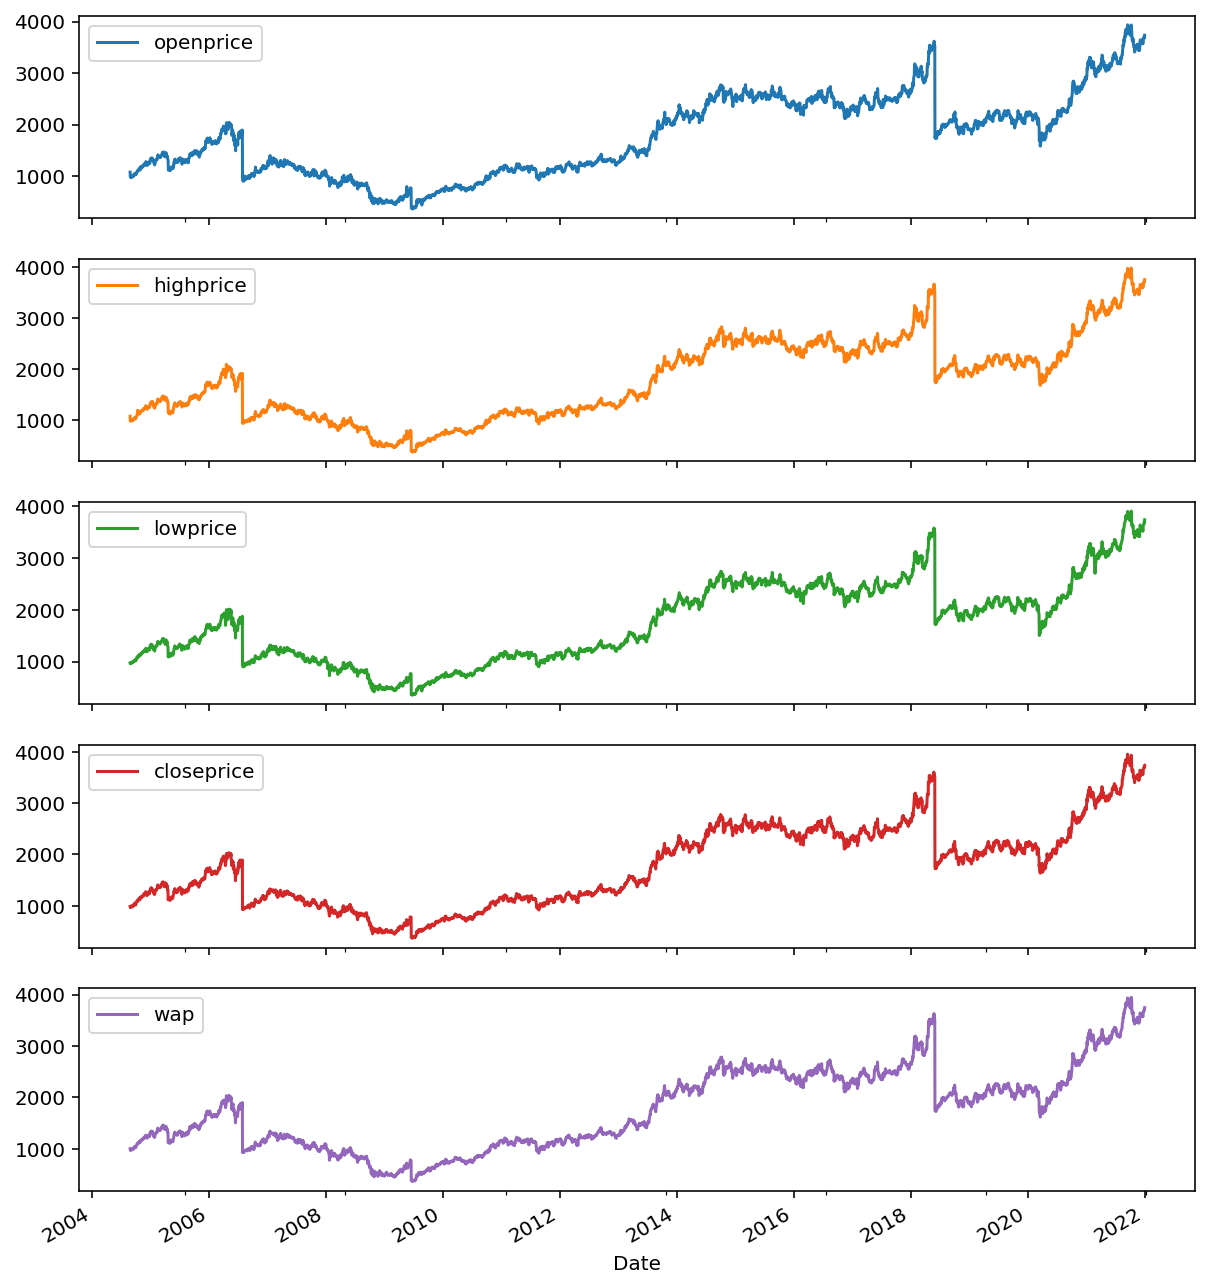

In [94]:
tcs['2002':'2021'].plot(subplots=True, figsize=(10,12))
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt1.png')
plt.show()

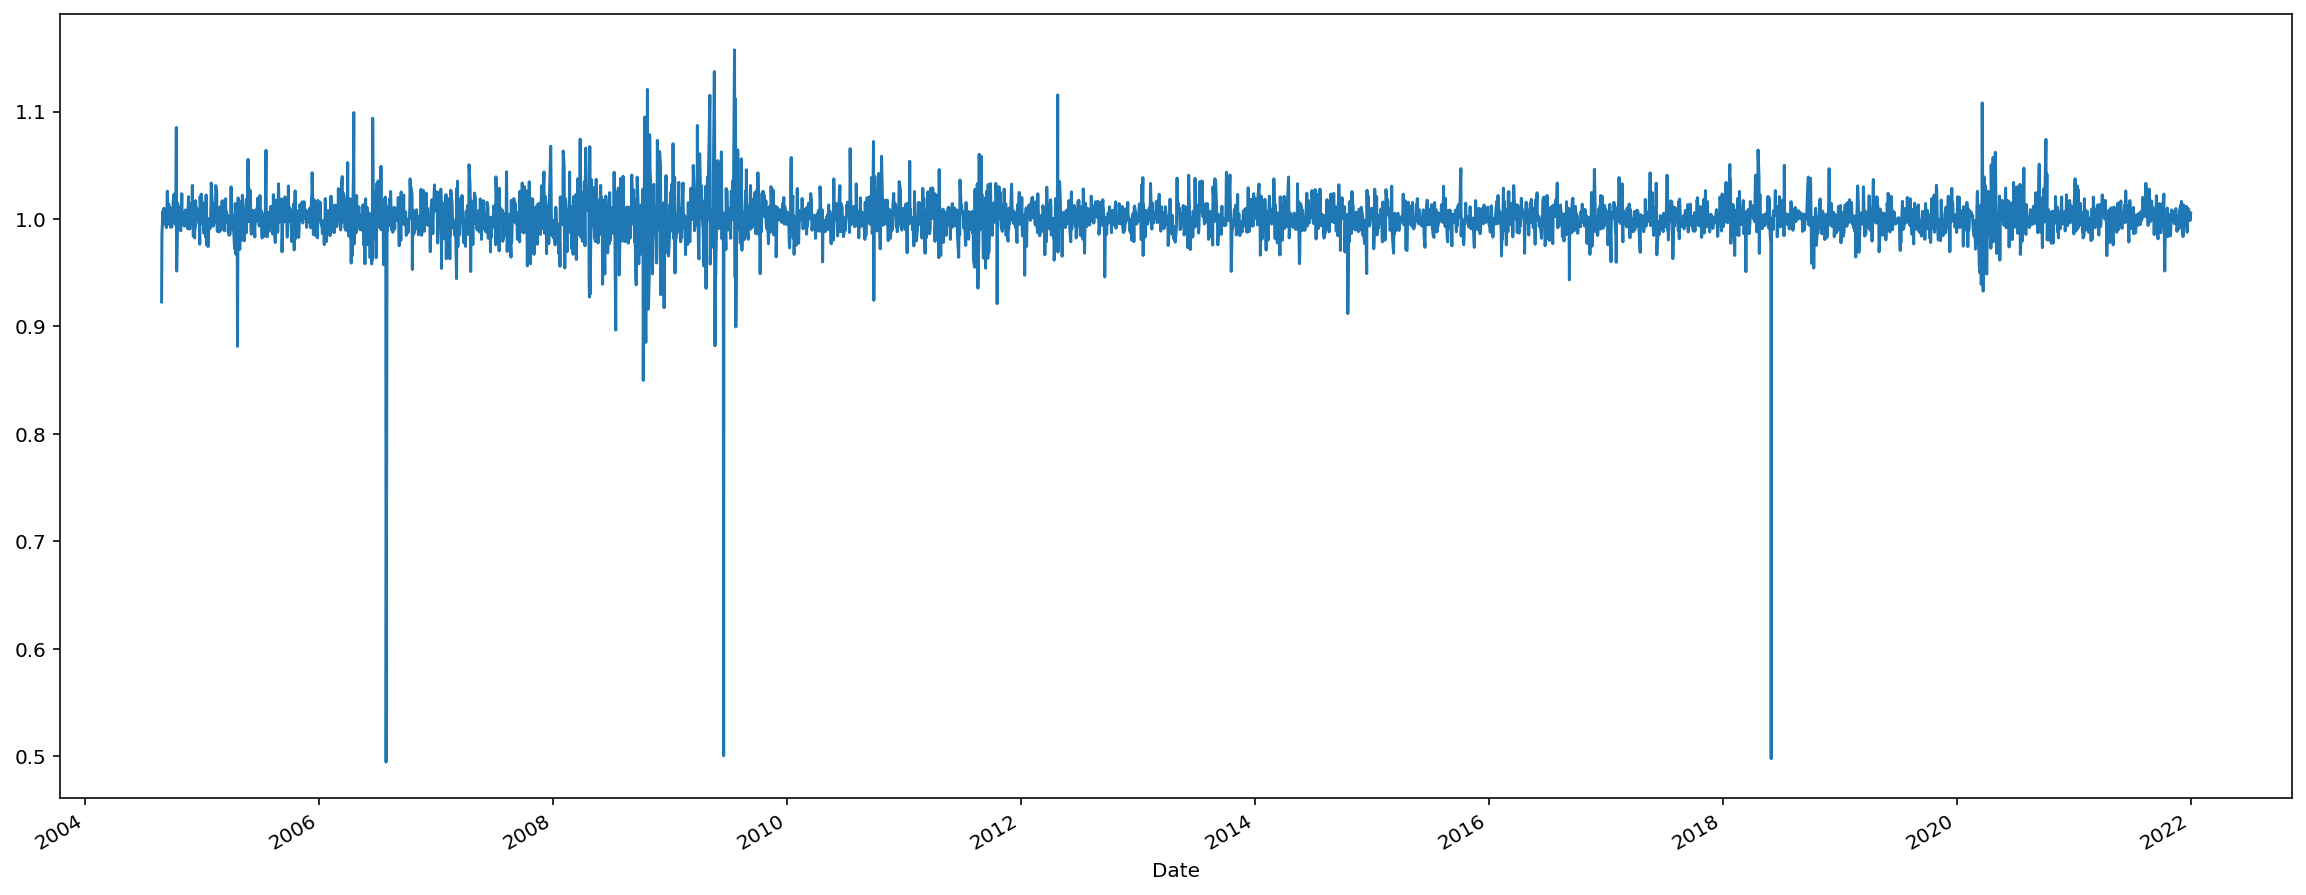

In [95]:
tcs['Change'] = tcs.highprice.div(tcs.highprice.shift())
tcs['Change'].plot(figsize=(20,8))
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt2.png')

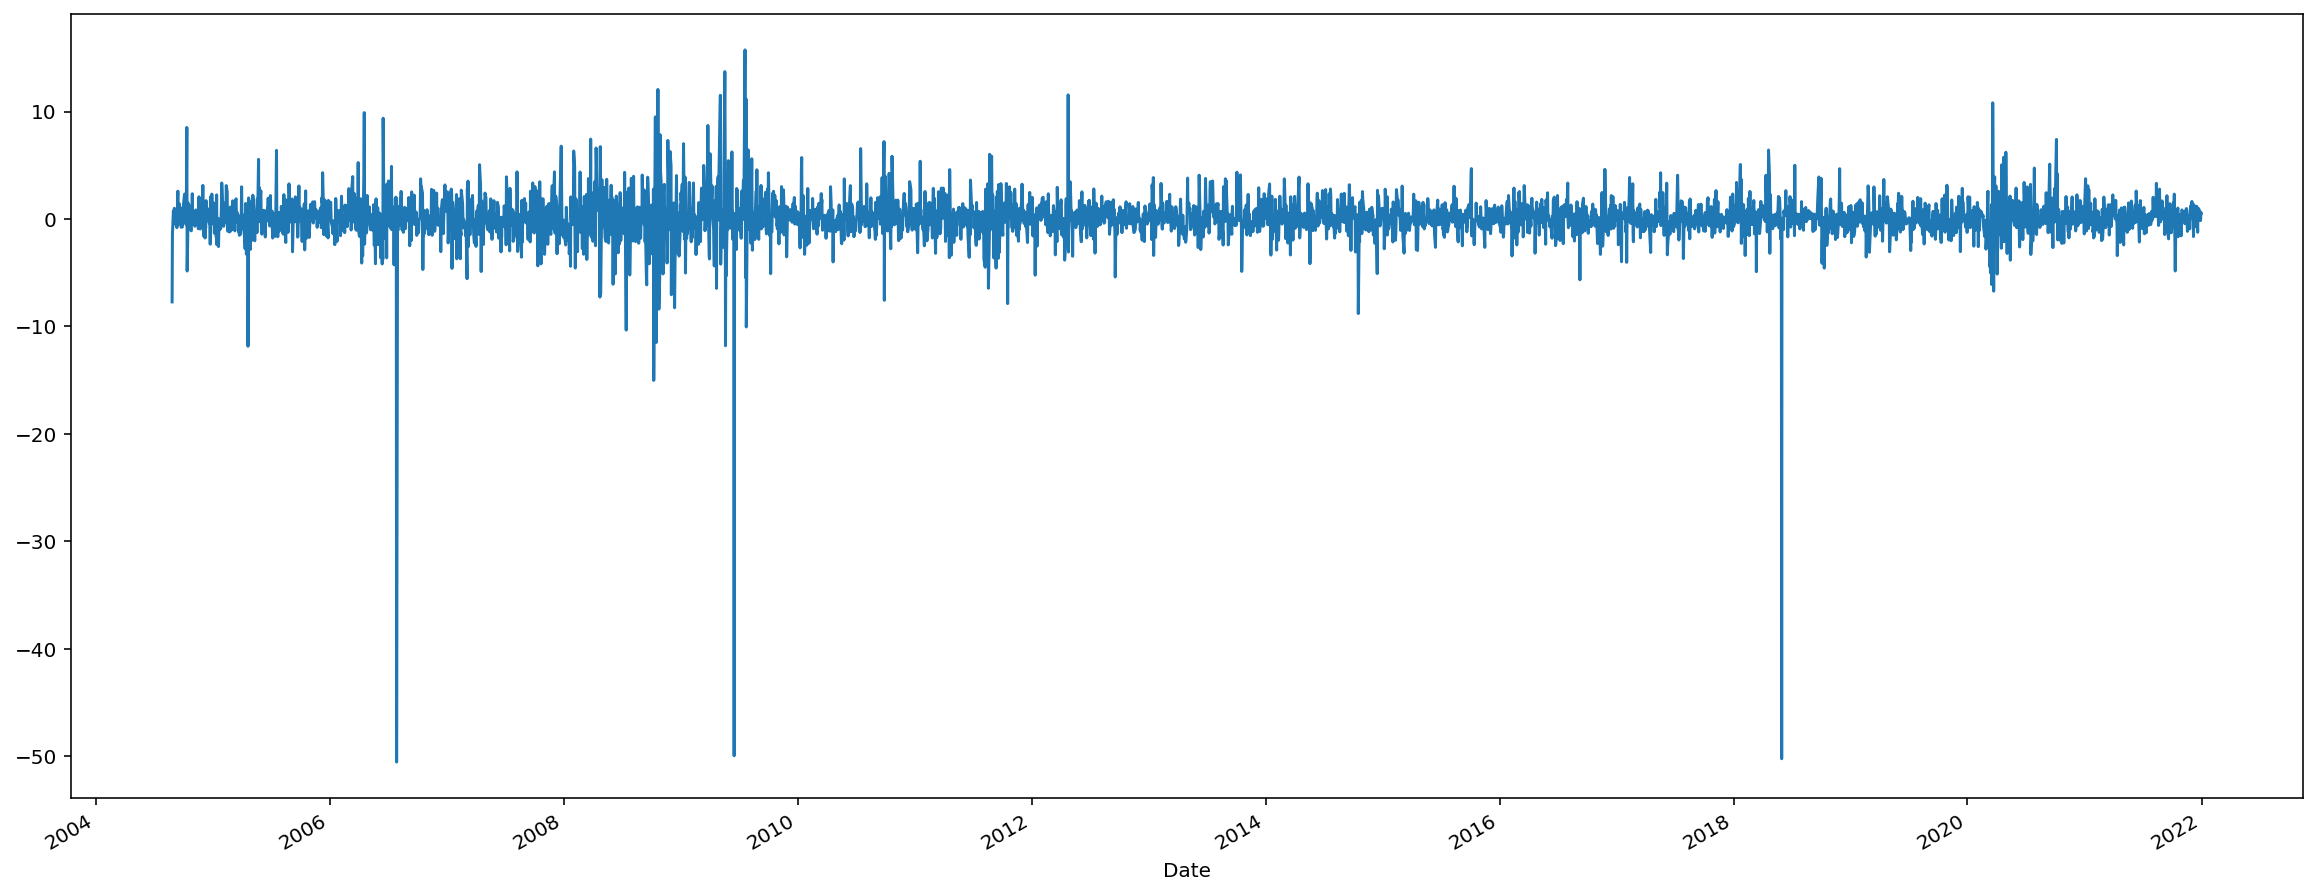

In [96]:
tcs['Return'] = tcs.Change.sub(1).mul(100)
tcs['Return'].plot(figsize=(20,8))
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt3.png')

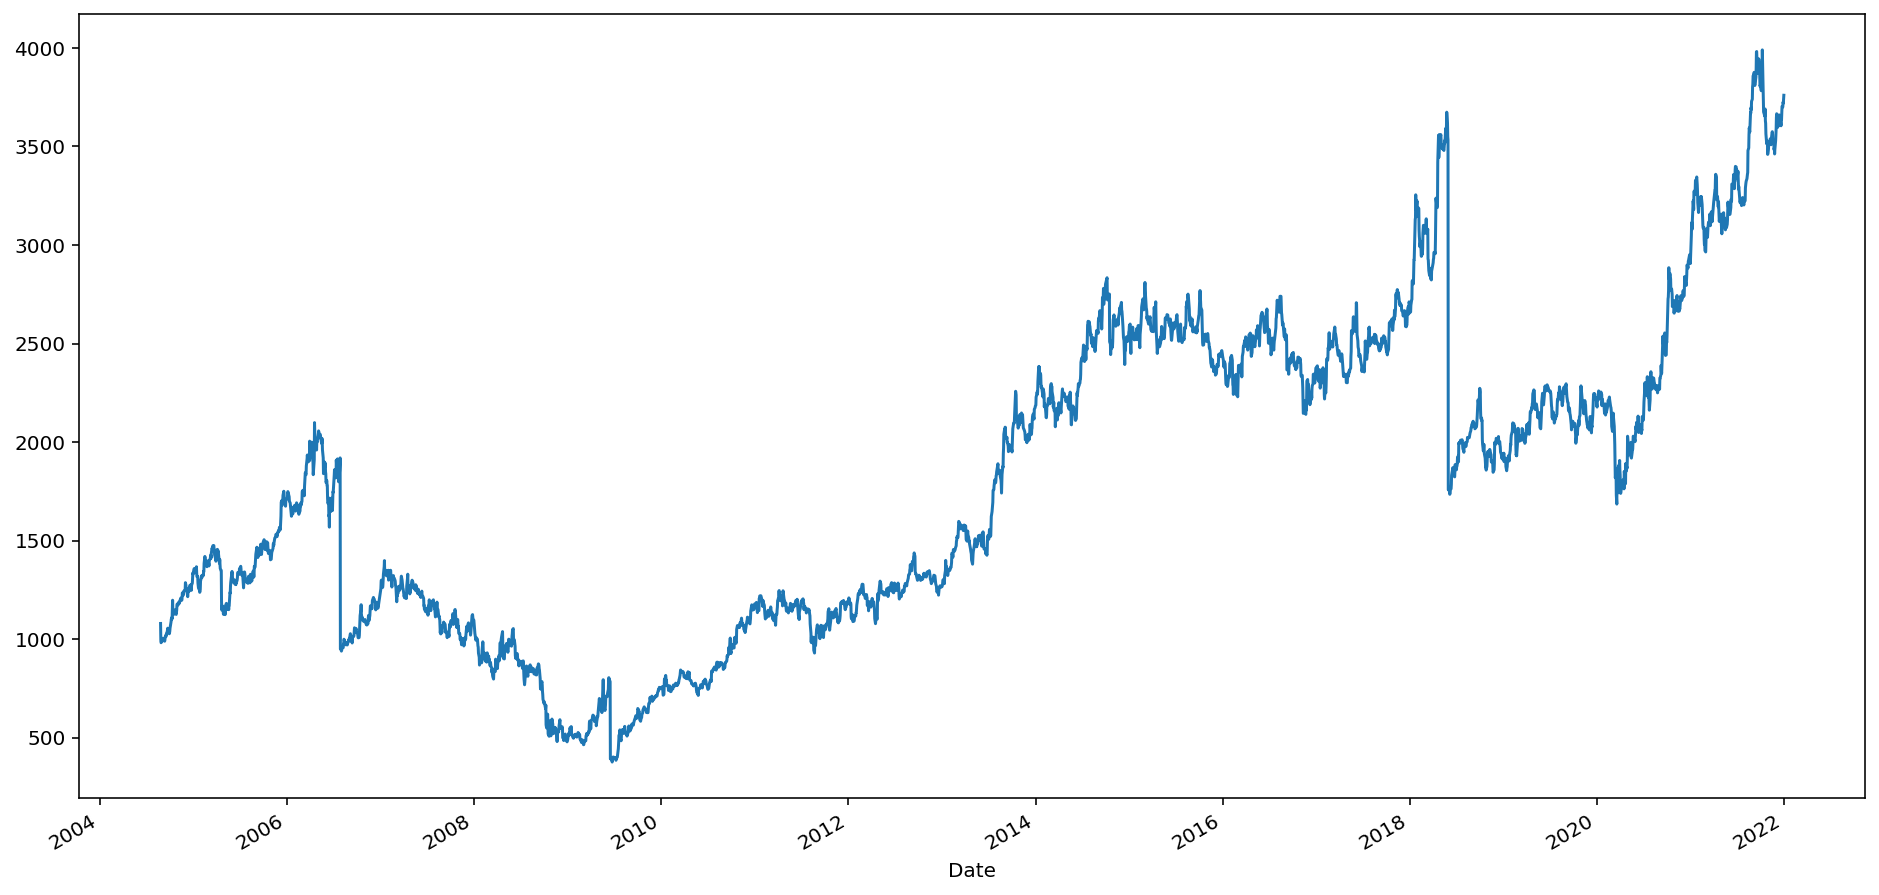

In [97]:
tcs["highprice"].plot(figsize=(16,8))
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt4.png')

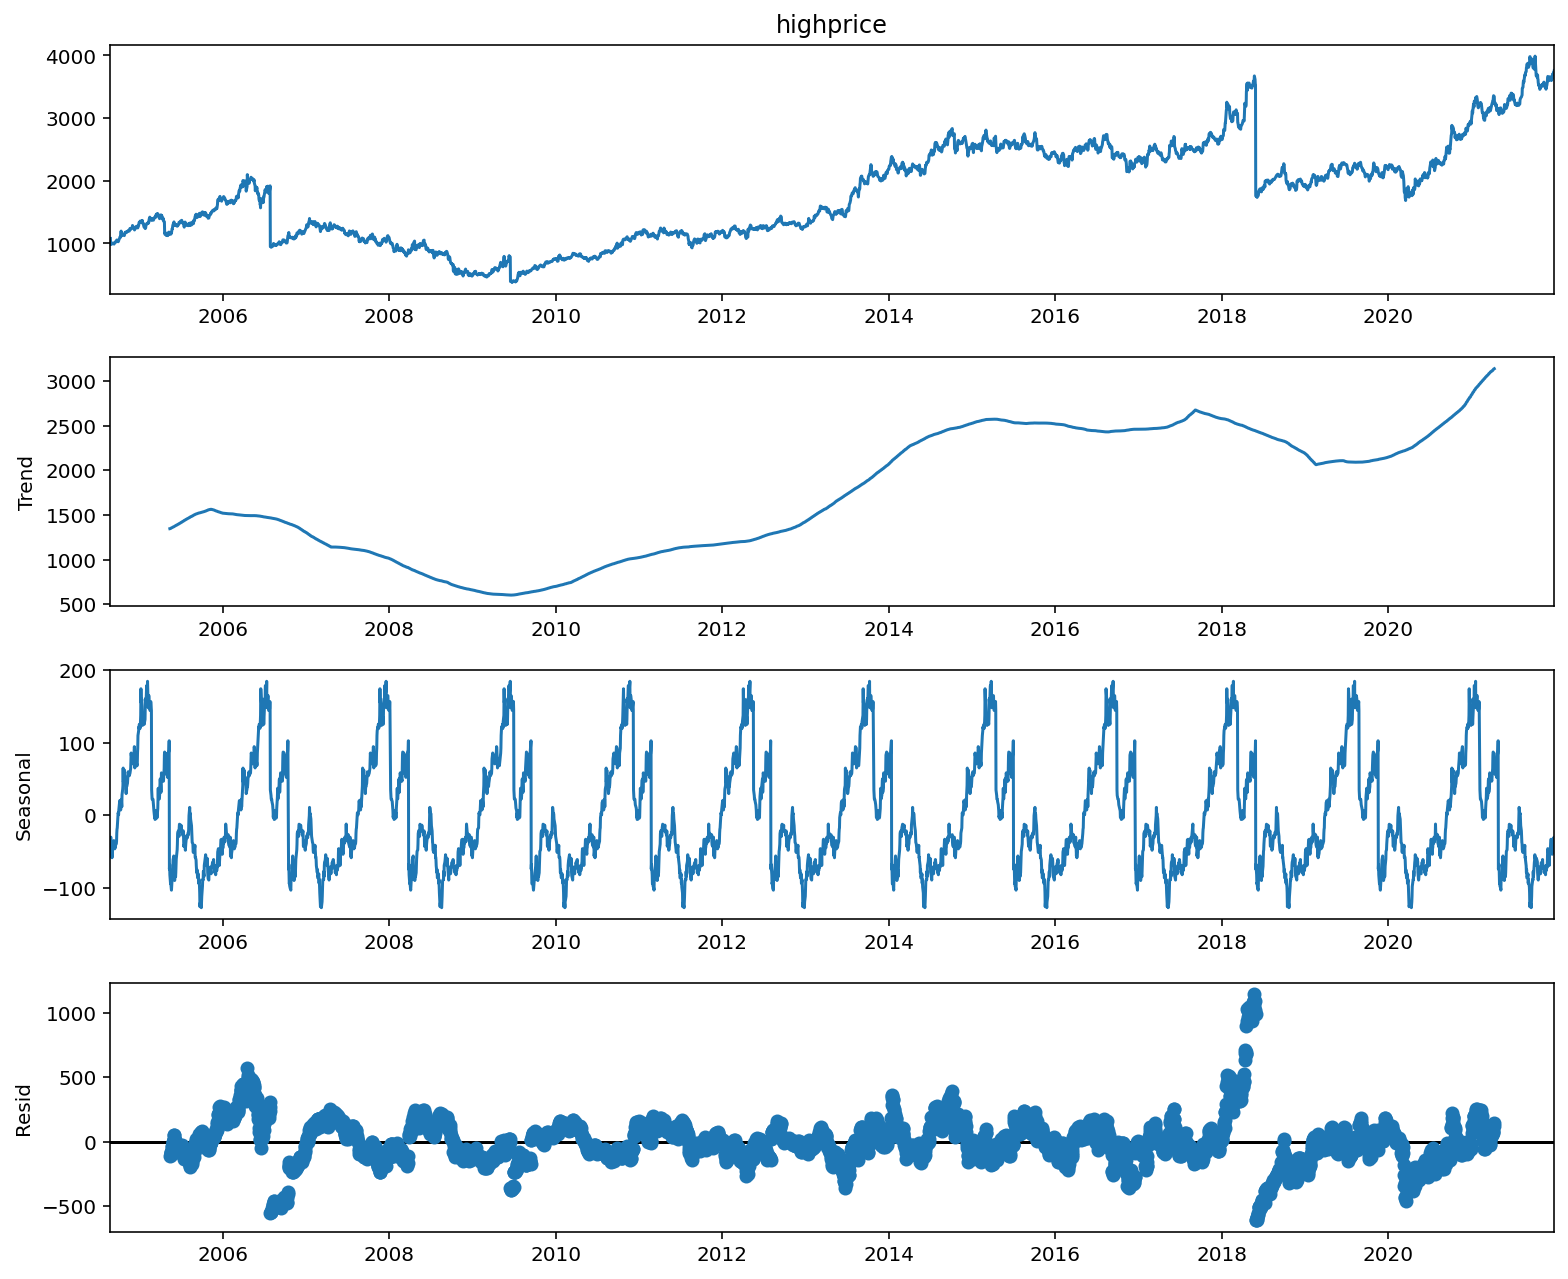

In [98]:
rcParams['figure.figsize'] = 11, 9
decomposed_tcs_volume = sm.tsa.seasonal_decompose(tcs["highprice"], period=360)
figure = decomposed_tcs_volume.plot()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt5.png')
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values

### Generating a random walk

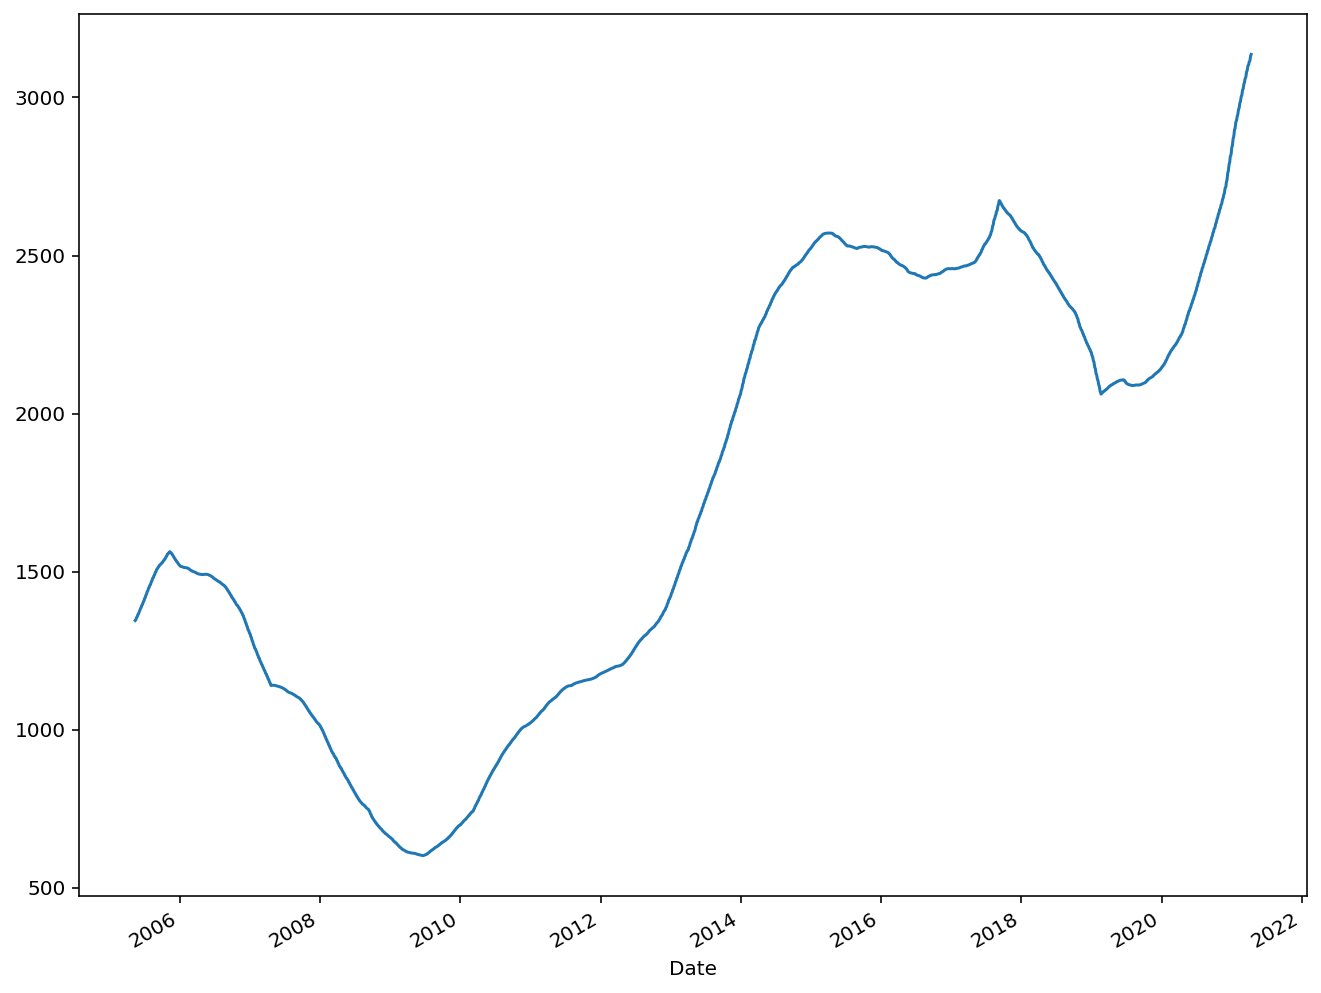

In [99]:
decomposed_tcs_volume.trend.plot()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt6.png')

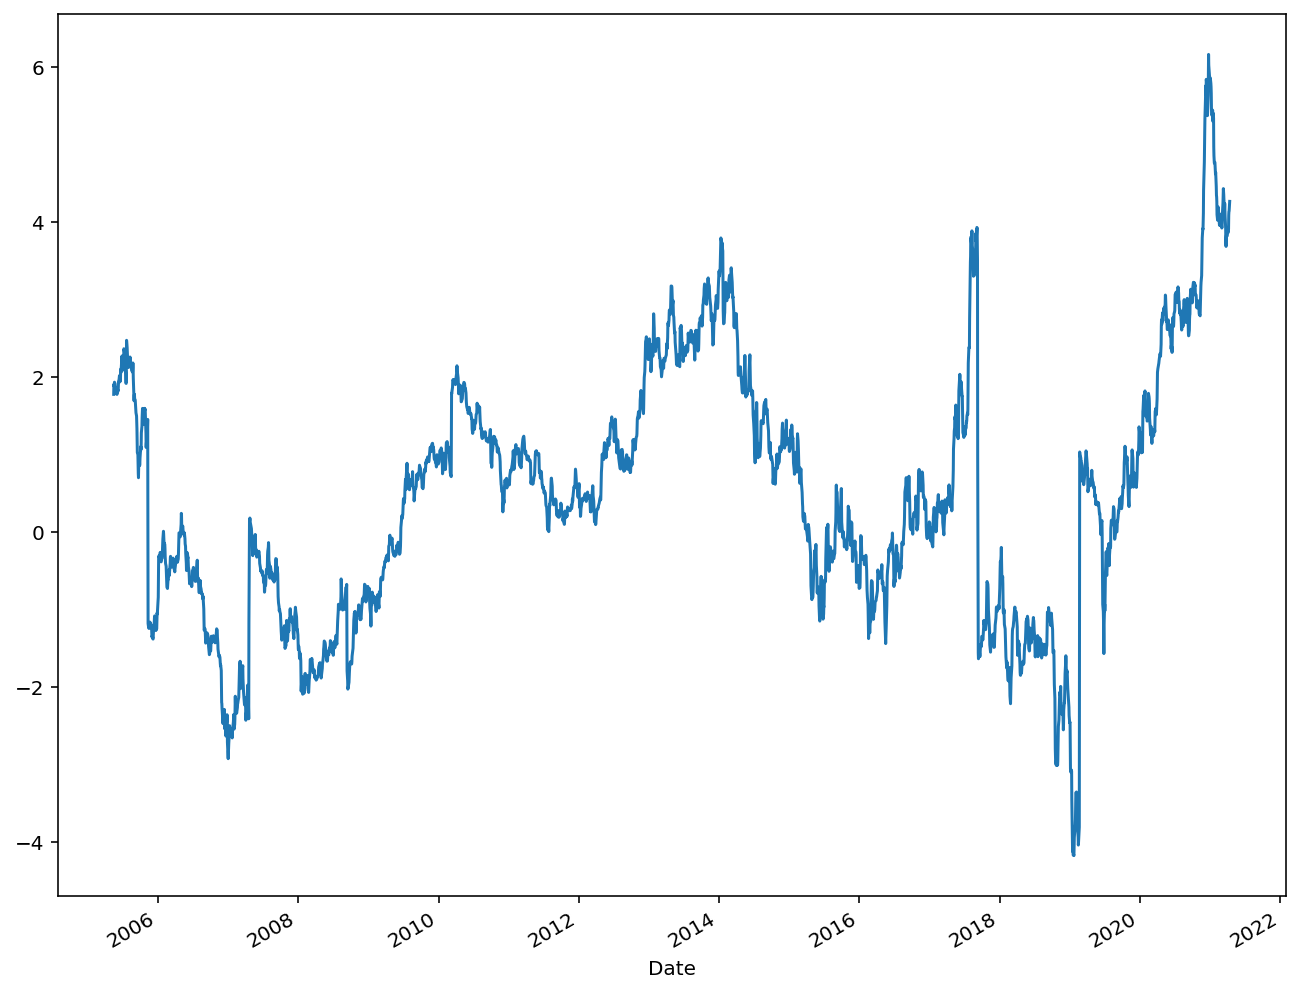

In [100]:
decomposed_tcs_volume.trend.diff().plot()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt7.png')

## ARIMA models
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.
ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter
### ARIMA(1,0,0)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

## Prediction using ARIMA model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4306
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -22715.923
Date:                Mon, 12 Dec 2022   AIC                          45437.846
Time:                        19:32:20   BIC                          45456.949
Sample:                             0   HQIC                         45444.593
                               - 4306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6215      0.002   -391.018      0.000      -0.625      -0.618
ar.L2         -0.3376      0.002   -200.338      0.000      -0.341      -0.334
sigma2      2243.2098      3.158    710.305      0.0

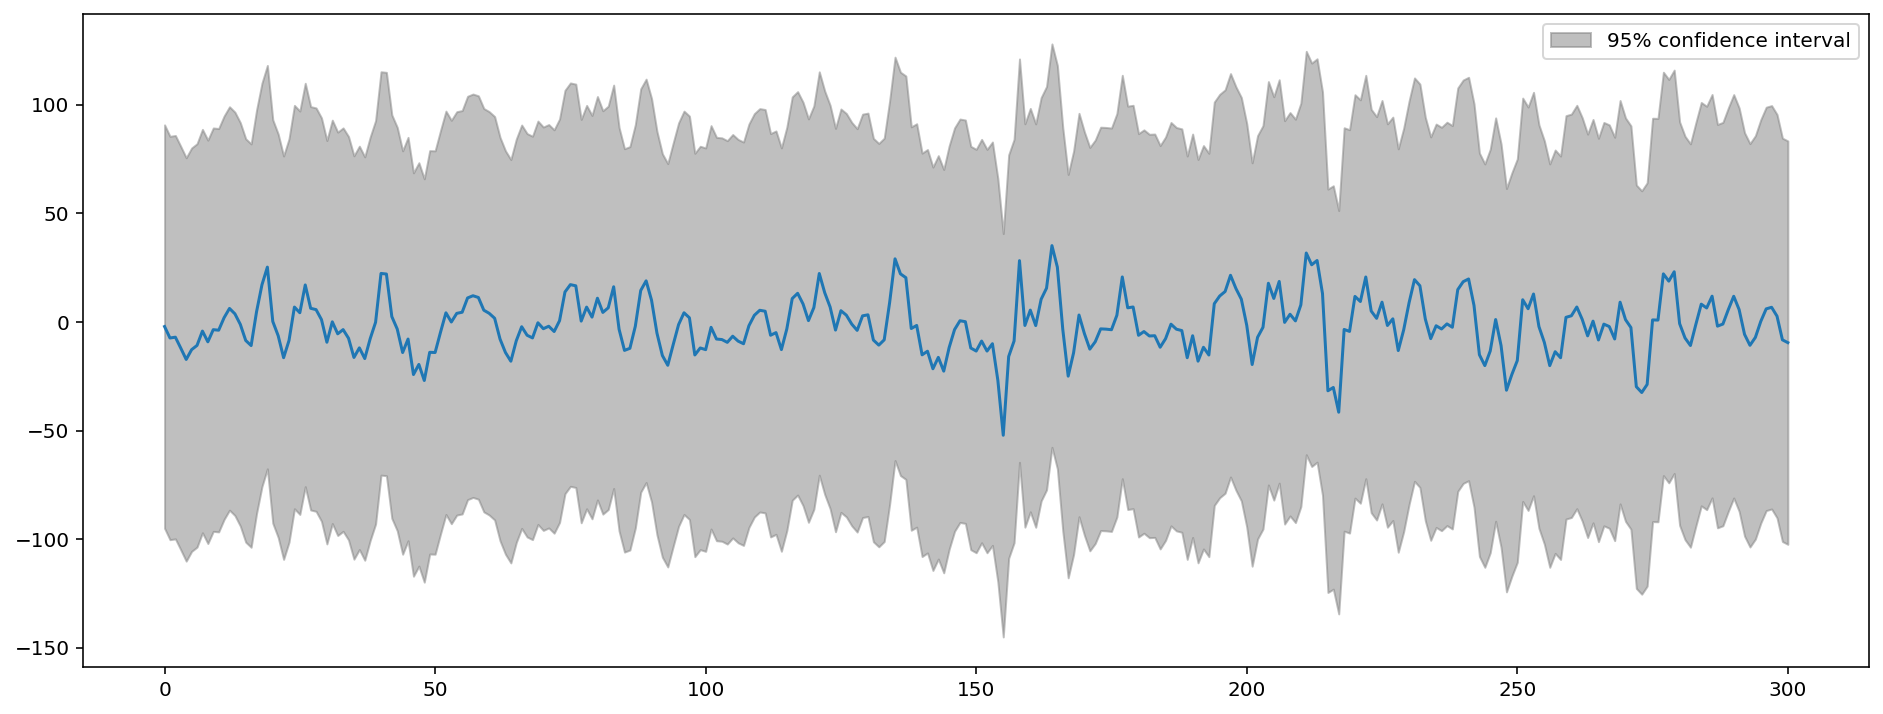

In [117]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(tcs["wap"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
plot_predict(result, start=700, end=1000)
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt8.png')
plt.show()

In [102]:
rmse = math.sqrt(mean_squared_error(tcs["wap"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 16.659035958488676.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4306
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -22772.644
Date:                Mon, 12 Dec 2022   AIC                          45551.288
Time:                        19:50:37   BIC                          45570.390
Sample:                             0   HQIC                         45558.034
                               - 4306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6333      0.002   -392.176      0.000      -0.636      -0.630
ar.L2         -0.3187      0.002   -180.591      0.000      -0.322      -0.315
sigma2      2301.9228      3.305    696.543      0.0

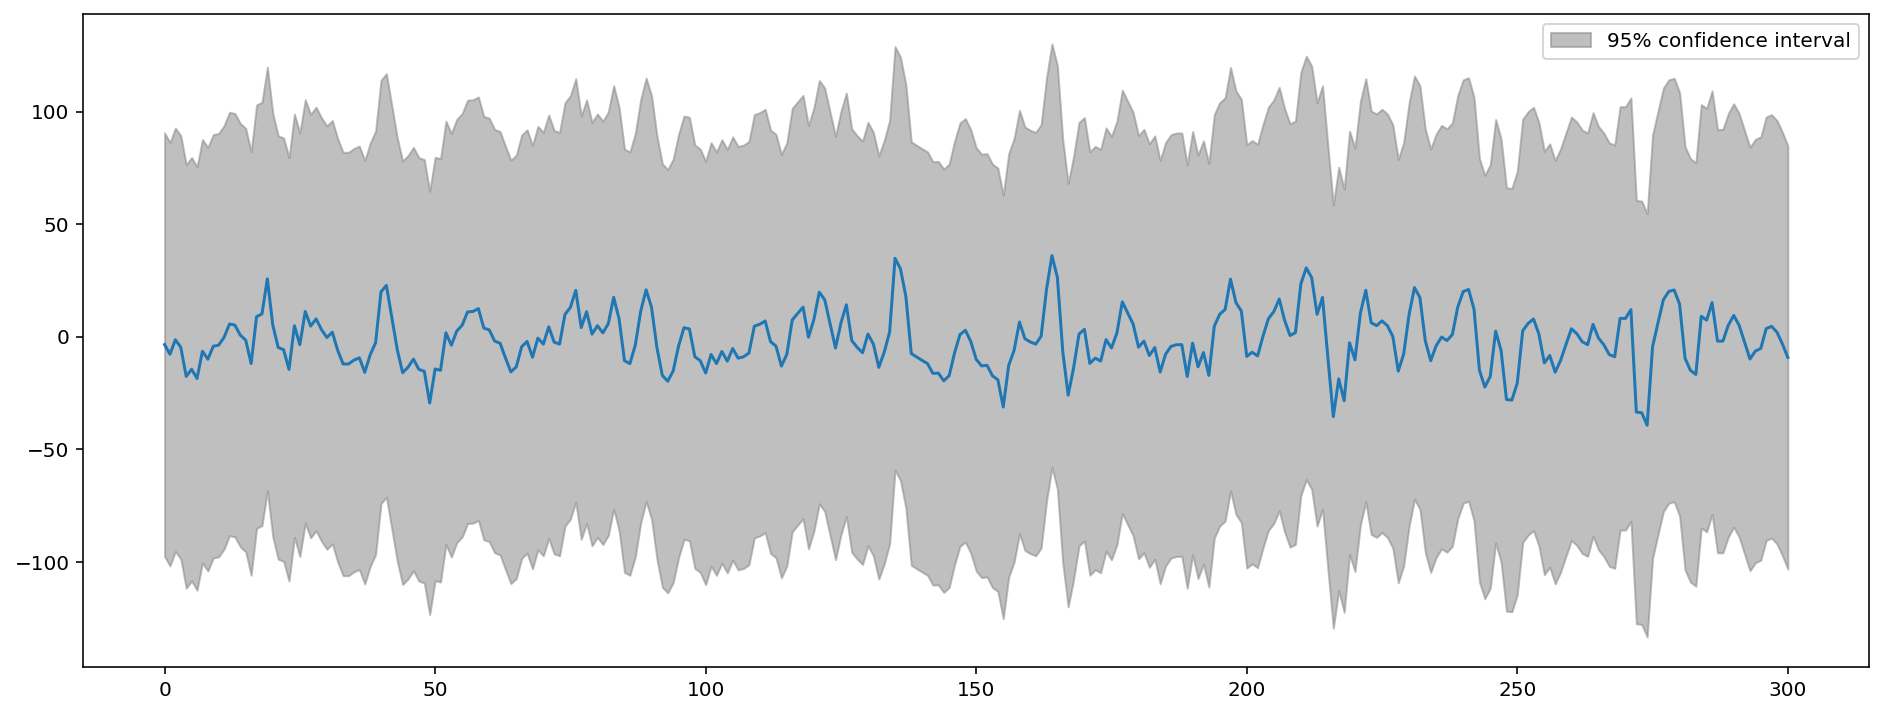

In [122]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(tcs["highprice"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
plot_predict(result, start=700, end=1000)
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt9.png')
plt.show()

In [123]:
rmse = math.sqrt(mean_squared_error(tcs["highprice"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 17.236539274885537.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4306
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -22882.754
Date:                Mon, 12 Dec 2022   AIC                          45771.508
Time:                        19:51:02   BIC                          45790.610
Sample:                             0   HQIC                         45778.254
                               - 4306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6407      0.002   -359.209      0.000      -0.644      -0.637
ar.L2         -0.3356      0.002   -184.384      0.000      -0.339      -0.332
sigma2      2424.0986      3.659    662.581      0.0

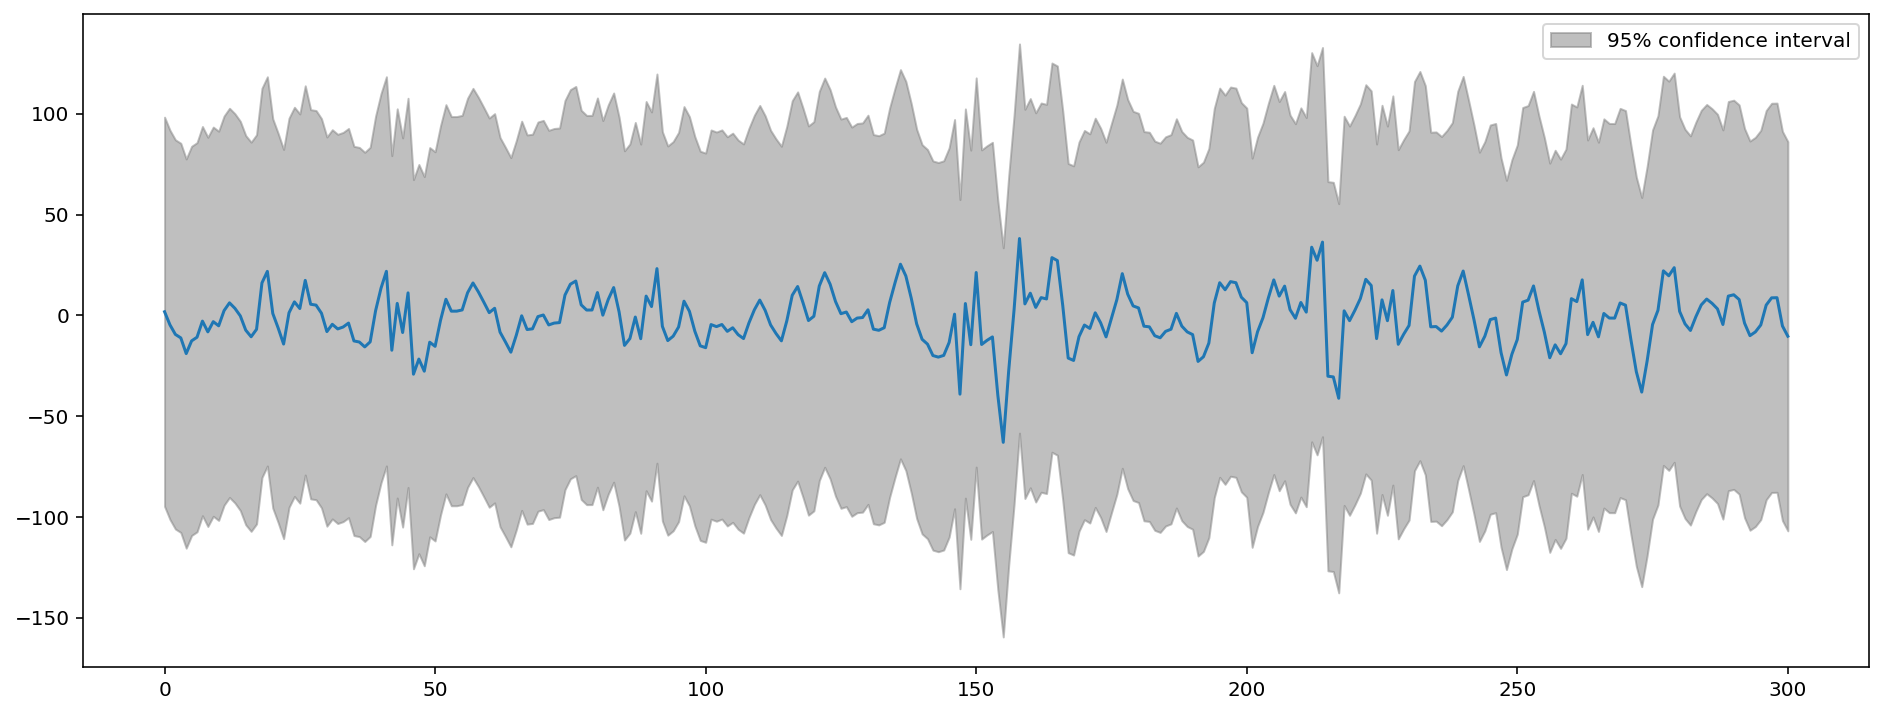

In [124]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(tcs["lowprice"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
plot_predict(result, start=700, end=1000)
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt10.png')
plt.show()

In [125]:
rmse = math.sqrt(mean_squared_error(tcs["lowprice"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 21.41270418961747.


## VAR models
Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

                                Statespace Model Results                               
Dep. Variable:     ['closeprice', 'openprice']   No. Observations:                 4306
Model:                              VARMA(2,1)   Log Likelihood              -41948.073
                                   + intercept   AIC                          83930.145
Date:                         Mon, 12 Dec 2022   BIC                          84038.397
Time:                                 19:52:37   HQIC                         83968.375
Sample:                                      0                                         
                                        - 4306                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):             4.17, 5.07   Jarque-Bera (JB):   84095917.96, 12892908.01
Prob(Q):                        0.04, 0.02   Prob(JB):                         0.00, 0.00
Heteroskedasticity (H):     

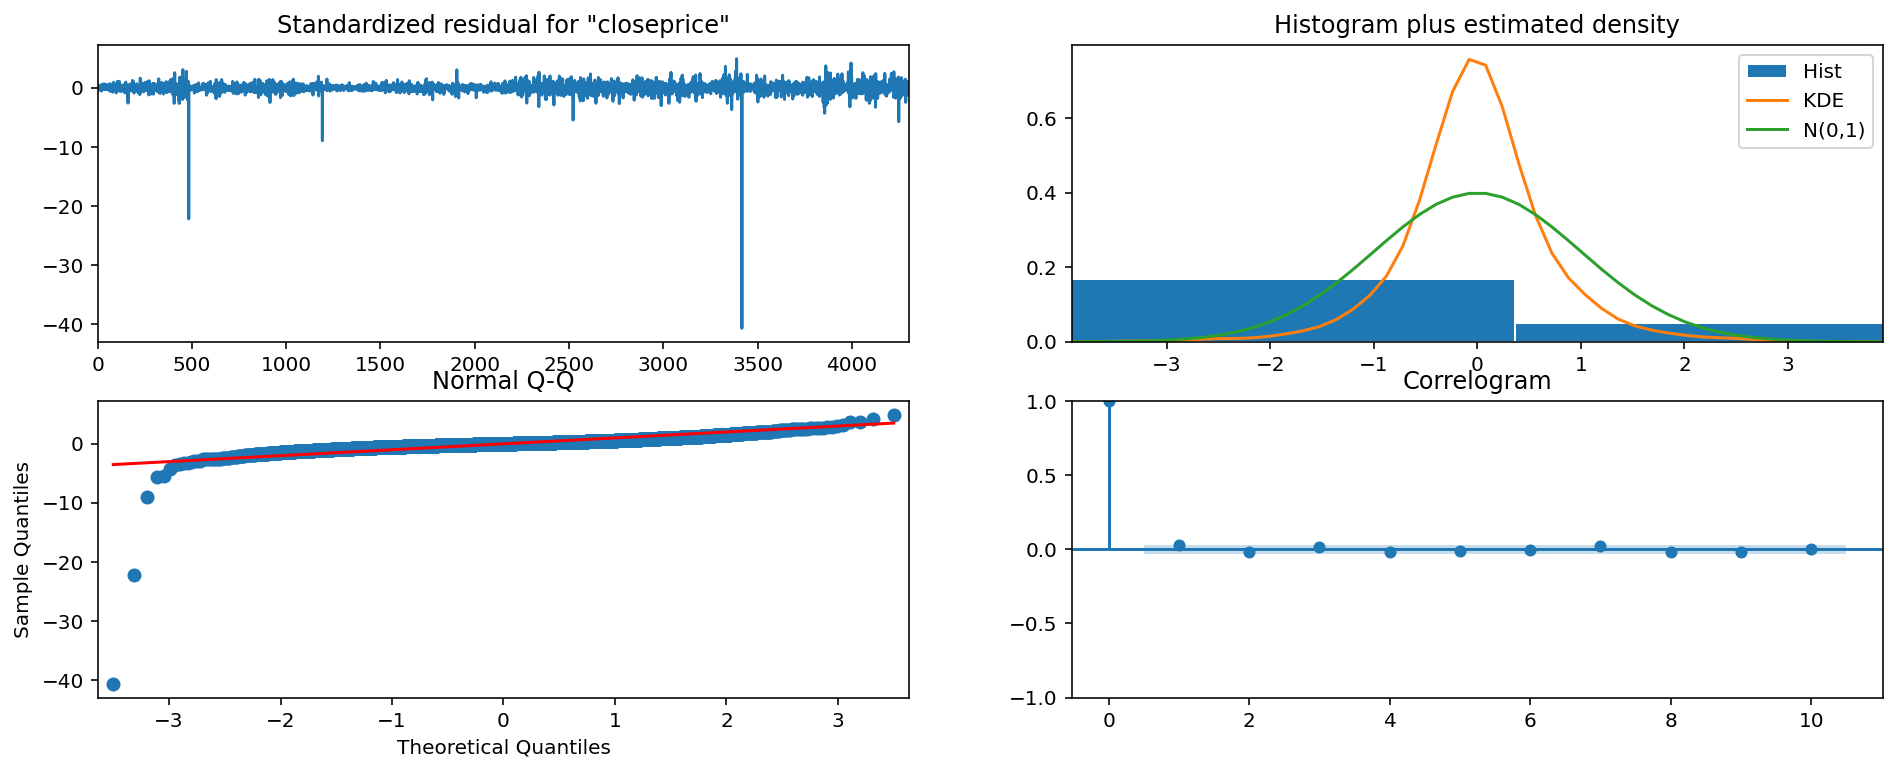

In [126]:
train_sample = pd.concat([tcs["closeprice"].diff().iloc[1:],tcs["openprice"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1), trend='c')
result = model.fit(maxiter=1000, disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt11.png')

In [127]:
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 44.90208423659397.


                               Statespace Model Results                              
Dep. Variable:     ['highprice', 'lowprice']   No. Observations:                 4306
Model:                            VARMA(2,1)   Log Likelihood              -41086.827
                                 + intercept   AIC                          82207.655
Date:                       Mon, 12 Dec 2022   BIC                          82315.907
Time:                               19:53:37   HQIC                         82245.884
Sample:                                    0                                         
                                      - 4306                                         
Covariance Type:                         opg                                         
Ljung-Box (L1) (Q):             0.00, 0.02   Jarque-Bera (JB):   138544616.55, 41452.94
Prob(Q):                        0.98, 0.88   Prob(JB):                       0.00, 0.00
Heteroskedasticity (H):         2.70, 1.70   Skew:

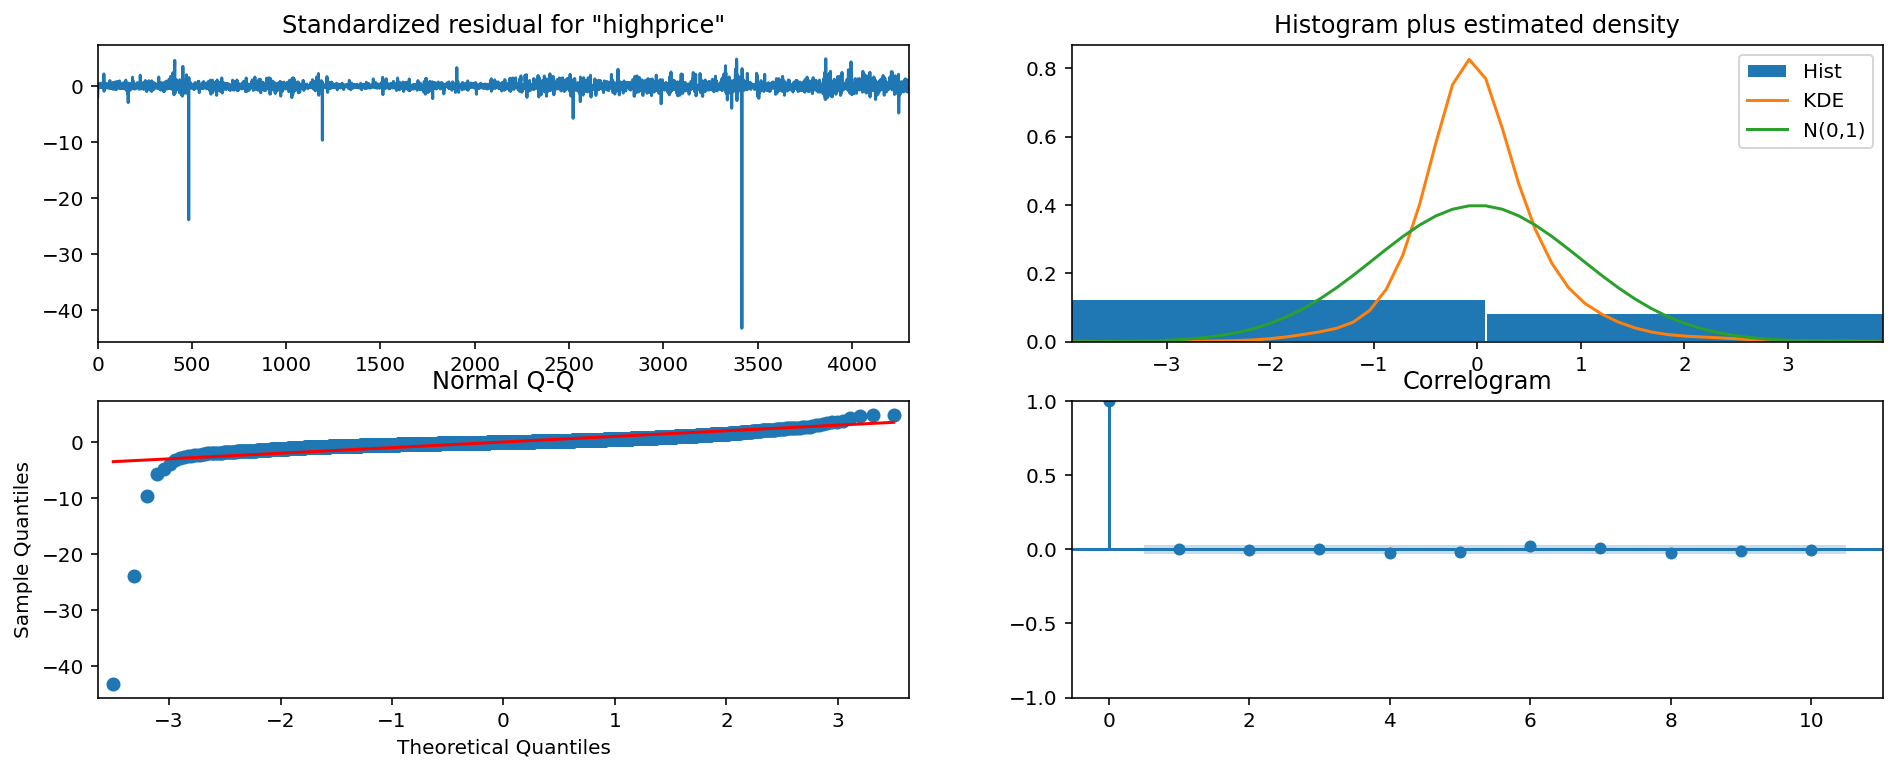

In [128]:
train_sample = pd.concat([tcs["highprice"].diff().iloc[1:],tcs["lowprice"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1), trend='c')
result = model.fit(maxiter=1000, disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt12.png')

In [129]:
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 40.55340883374828.


## SARIMA models
SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4306
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -22365.368
Date:                Mon, 12 Dec 2022   AIC                          44750.737
Time:                        19:56:44   BIC                          44814.414
Sample:                             0   HQIC                         44773.224
                               - 4306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1046      0.125      0.837      0.402      -0.140       0.350
ar.L1         -0.5250      0.173     -3.043      0.002      -0.863      -0.187
ar.L2         -0.0964      0.068     -1.419      0.1

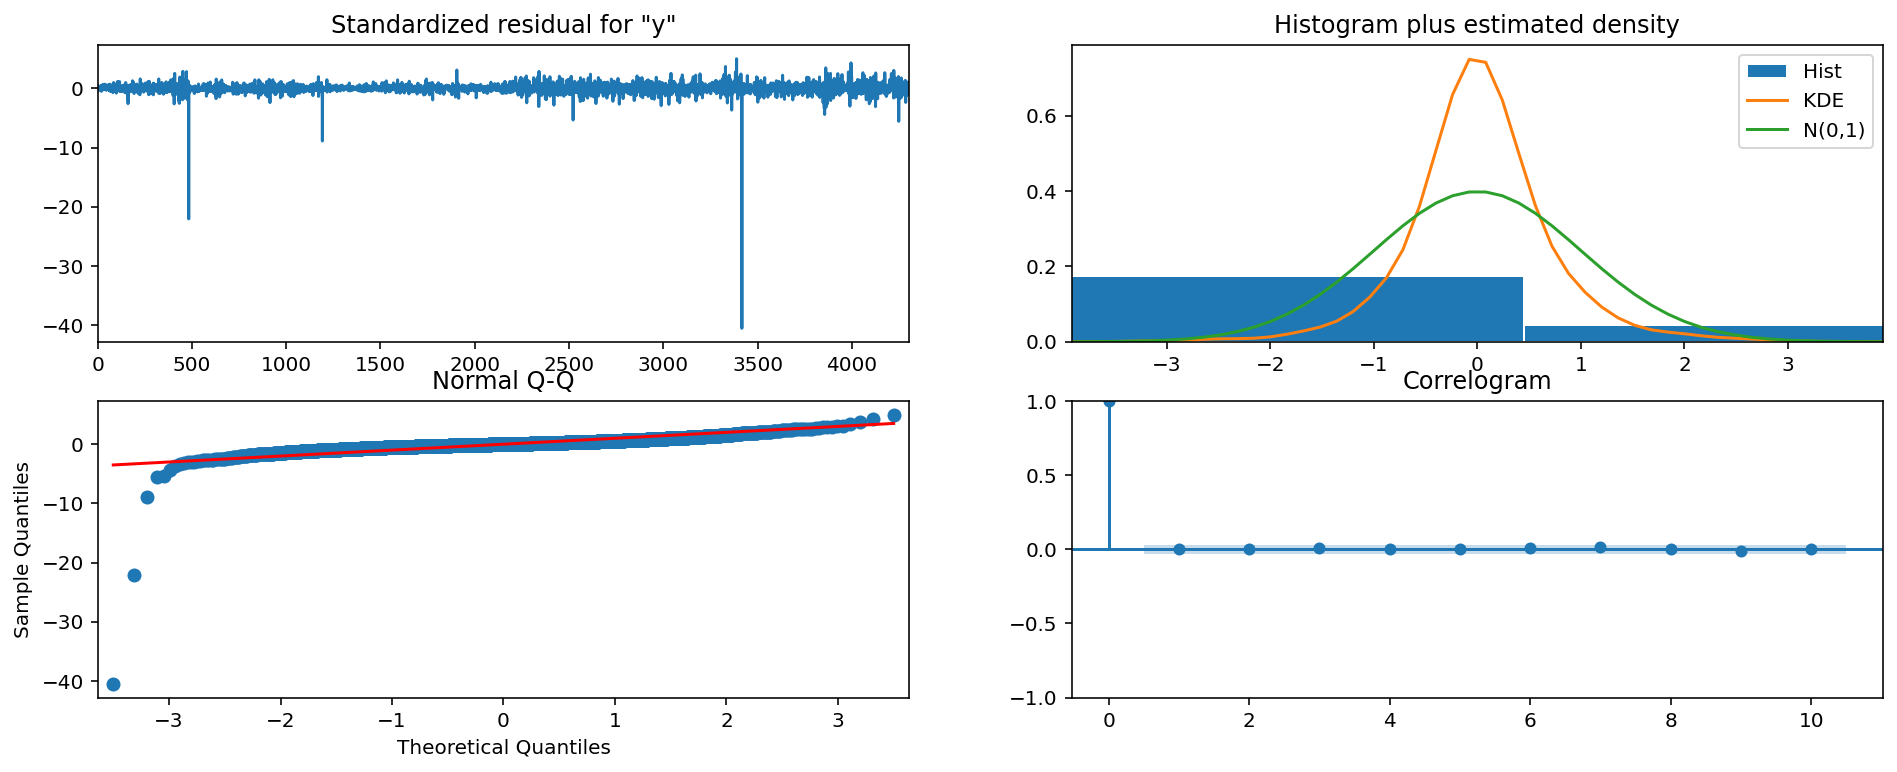

In [131]:
train_sample = tcs["closeprice"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt13.png')

In [132]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 51.79109488332988.


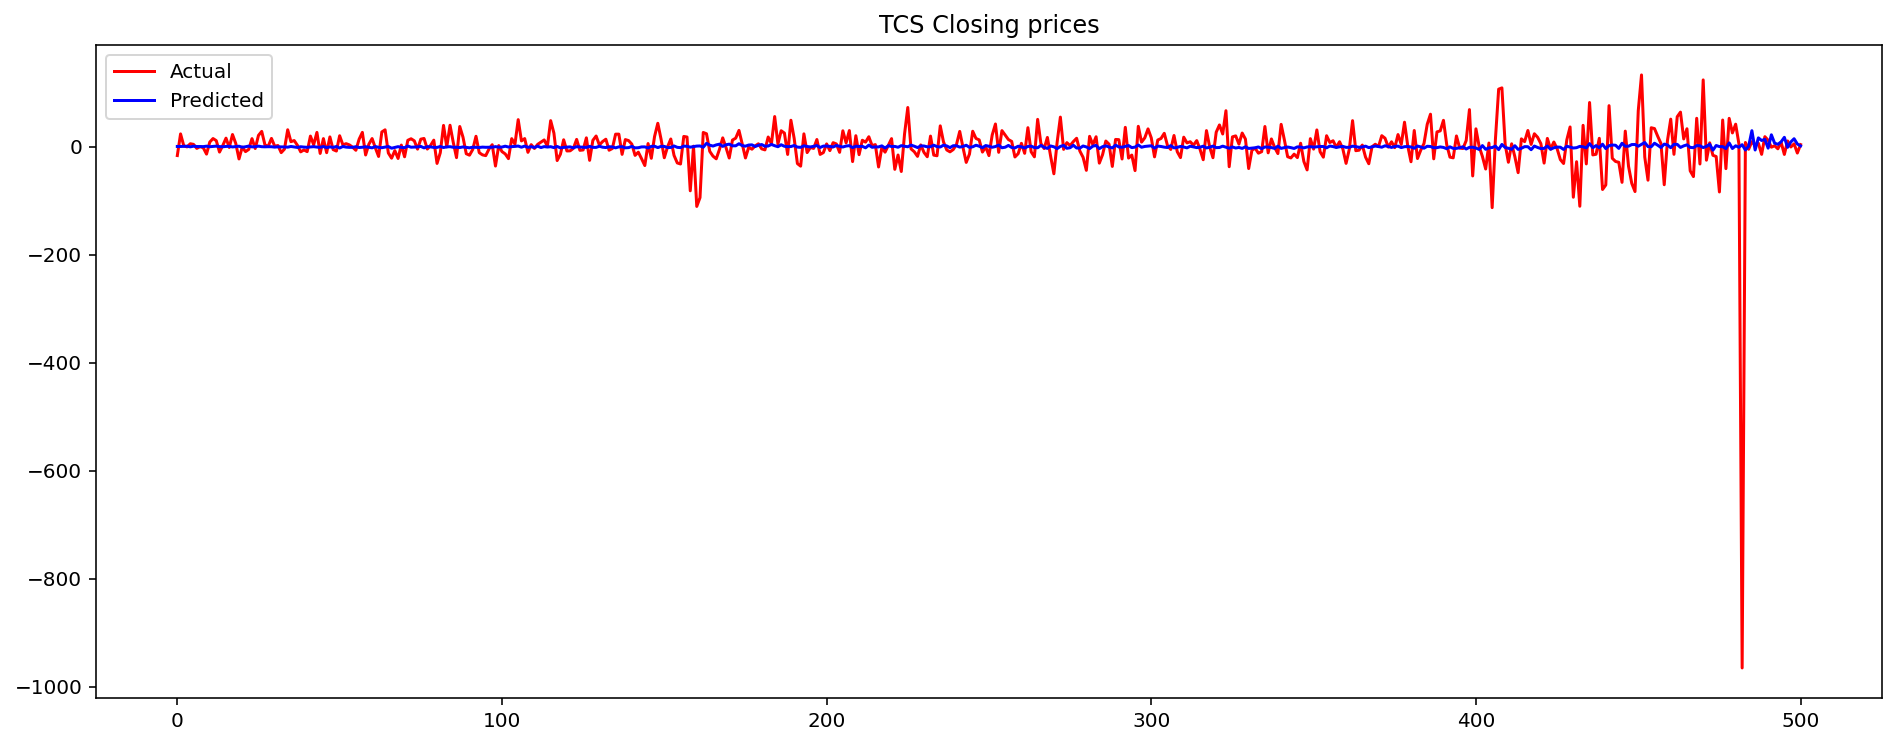

In [133]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('TCS Closing prices')
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt14.png')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4306
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -22170.124
Date:                Mon, 12 Dec 2022   AIC                          44360.247
Time:                        19:57:26   BIC                          44423.925
Sample:                             0   HQIC                         44382.735
                               - 4306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1474      3.018      0.380      0.704      -4.769       7.064
ar.L1         -0.1727      0.307     -0.562      0.574      -0.775       0.430
ar.L2         -1.2951      0.200     -6.480      0.0

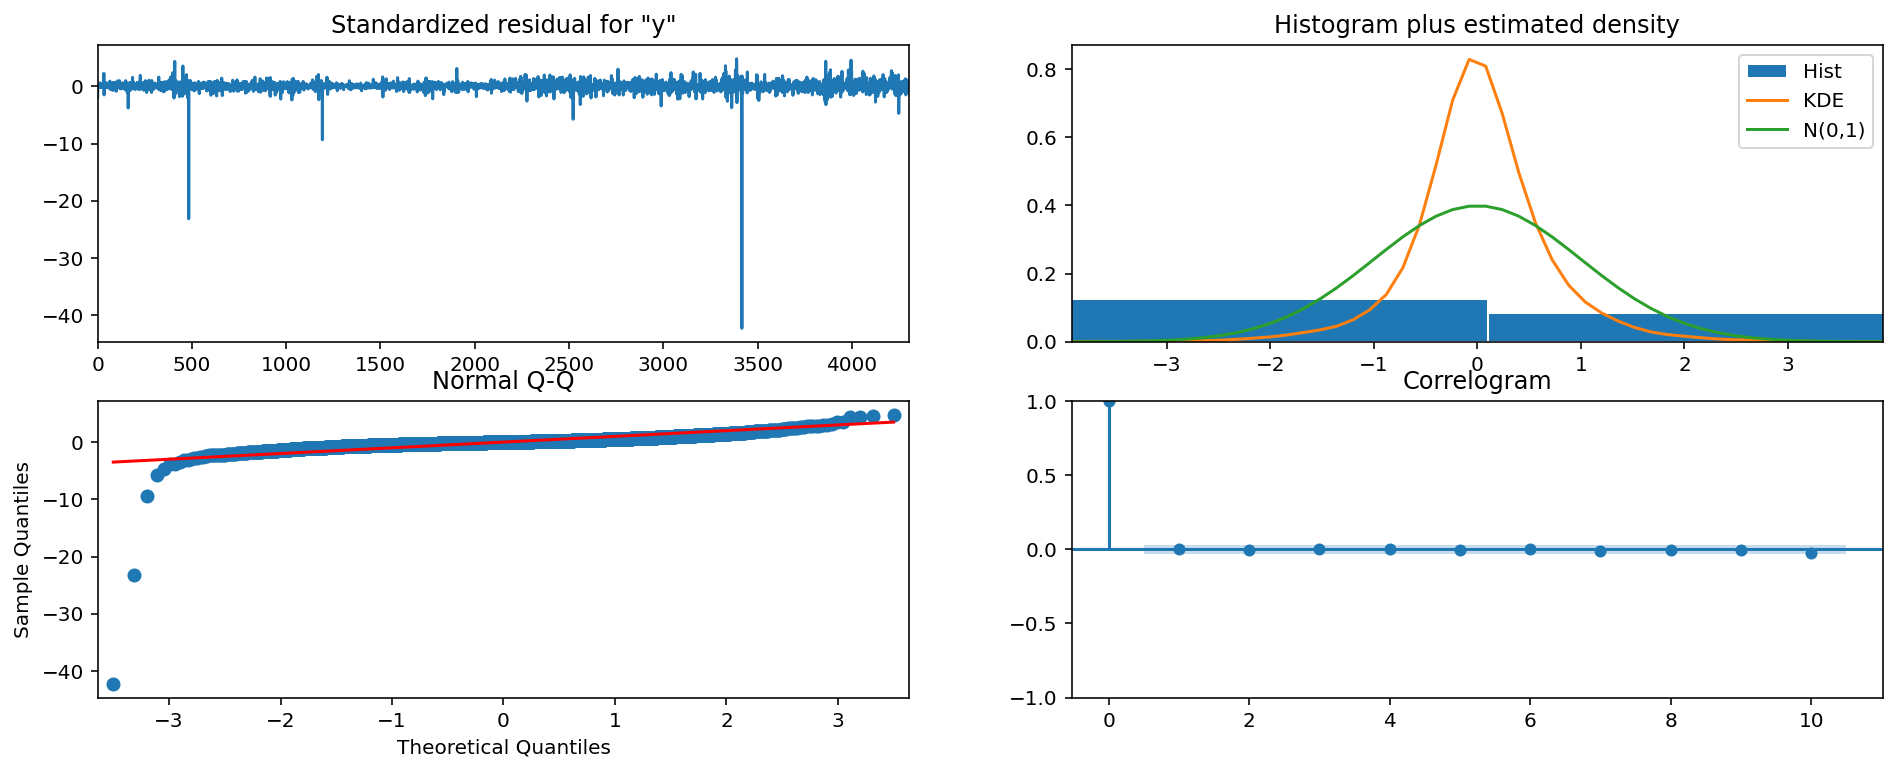

In [134]:
train_sample = tcs["highprice"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt15.png')

In [135]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 50.72842588948687.


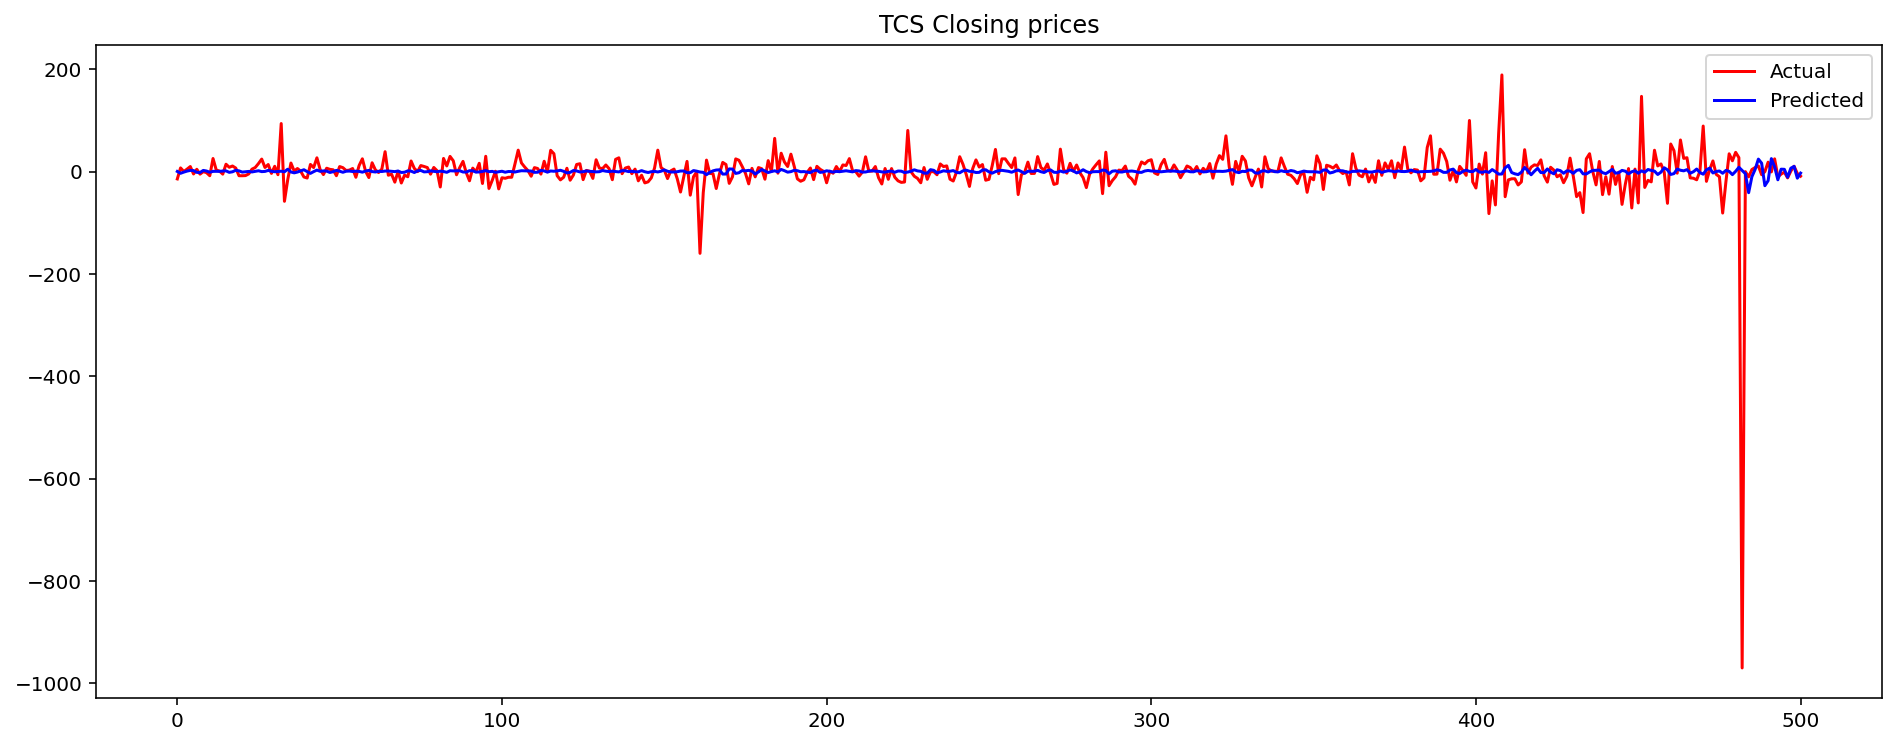

In [136]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('TCS Closing prices')
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt16.png')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4306
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -22365.368
Date:                Mon, 12 Dec 2022   AIC                          44750.737
Time:                        19:58:14   BIC                          44814.414
Sample:                             0   HQIC                         44773.224
                               - 4306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1046      0.125      0.837      0.402      -0.140       0.350
ar.L1         -0.5250      0.173     -3.043      0.002      -0.863      -0.187
ar.L2         -0.0964      0.068     -1.419      0.1

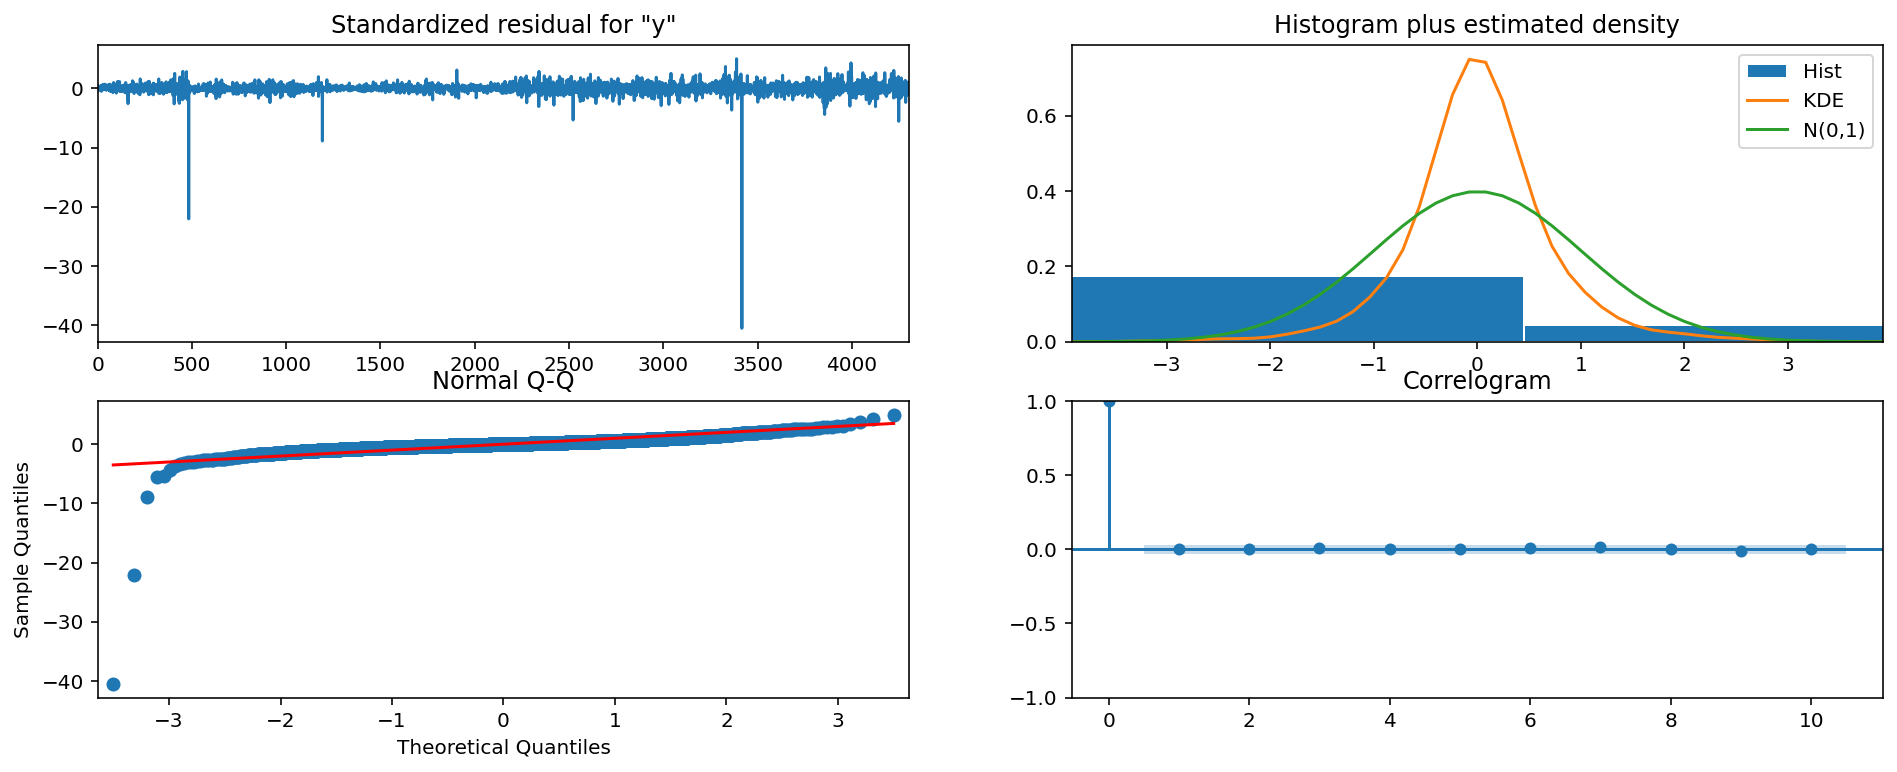

In [137]:
train_sample = tcs["closeprice"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt17.png')

In [138]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 51.79109488332988.


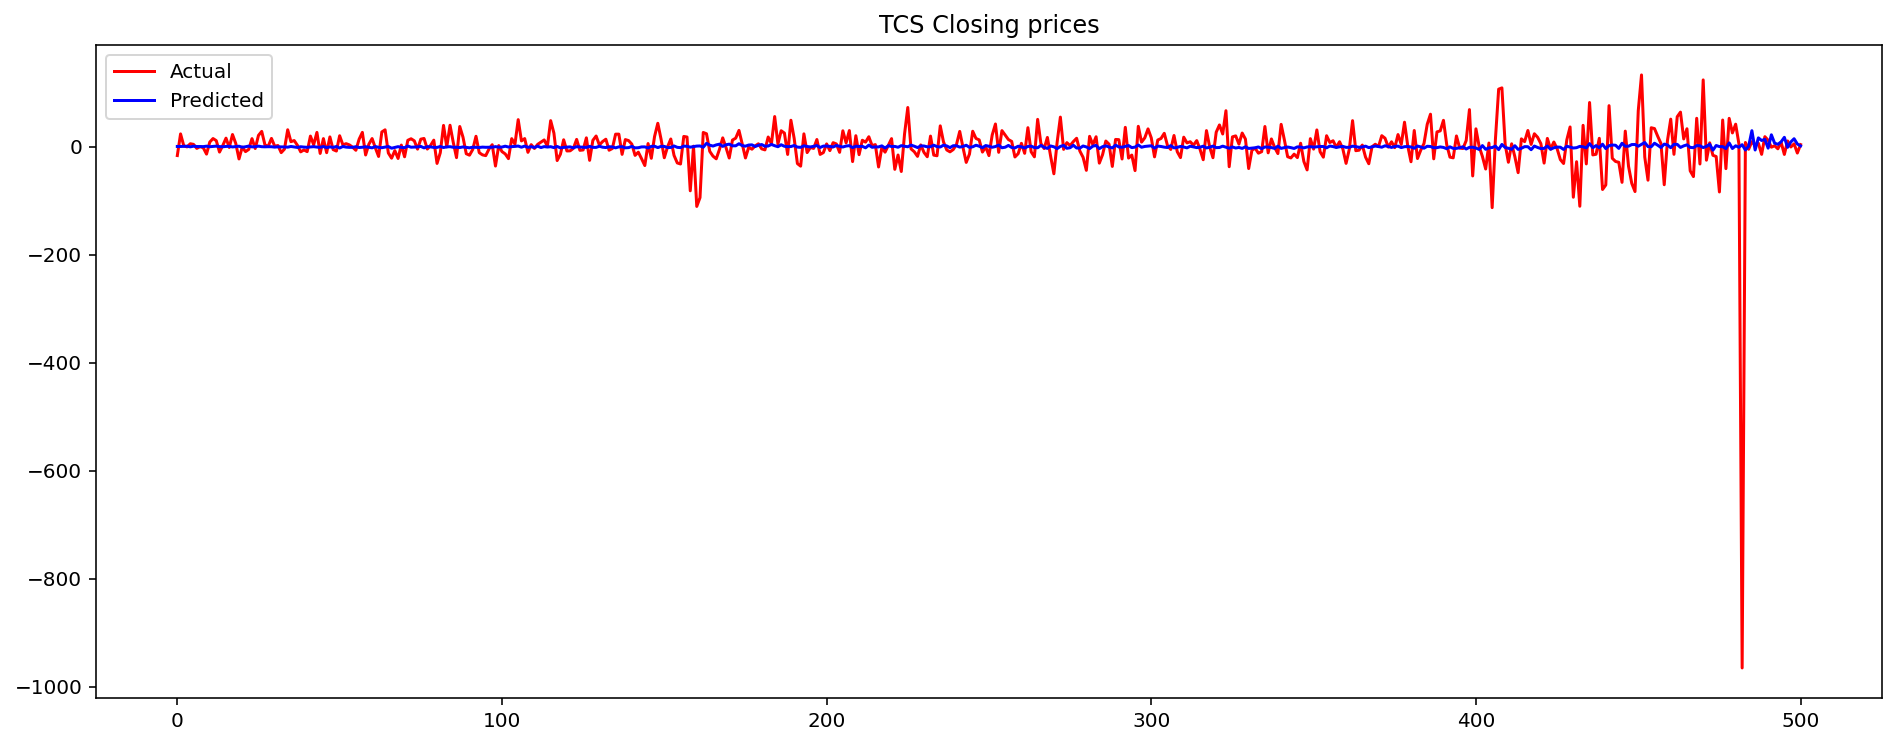

In [139]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('TCS Closing prices')
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt18.png')
plt.show()

## Unobserved components
A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. The following model shows a possible scenario:

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4306
Model:                    local level   Log Likelihood              -22376.522
Date:                Mon, 12 Dec 2022   AIC                          44757.044
Time:                        19:59:15   BIC                          44769.779
Sample:                             0   HQIC                         44761.541
                               - 4306                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1911.7540      2.393    798.933      0.000    1907.064    1916.444
sigma2.level      2.158e-11      0.003   8.07e-09      1.000      -0.005       0.005
Ljung-Box (L1) (Q):         

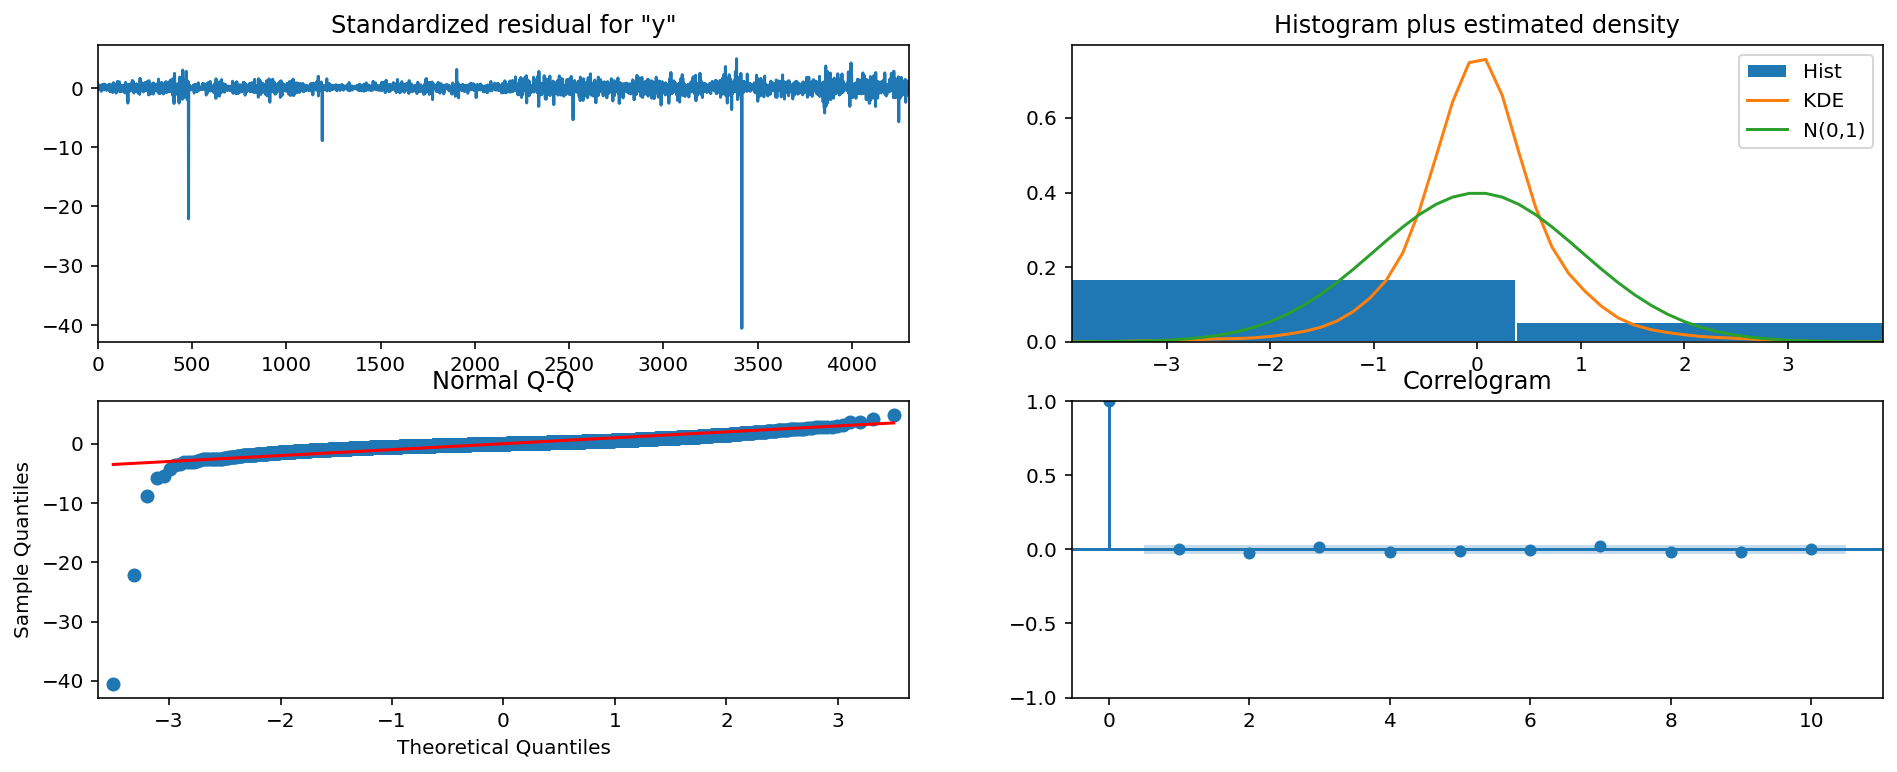

In [140]:
train_sample = tcs["closeprice"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt19.png')

In [141]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 51.71534025049827.


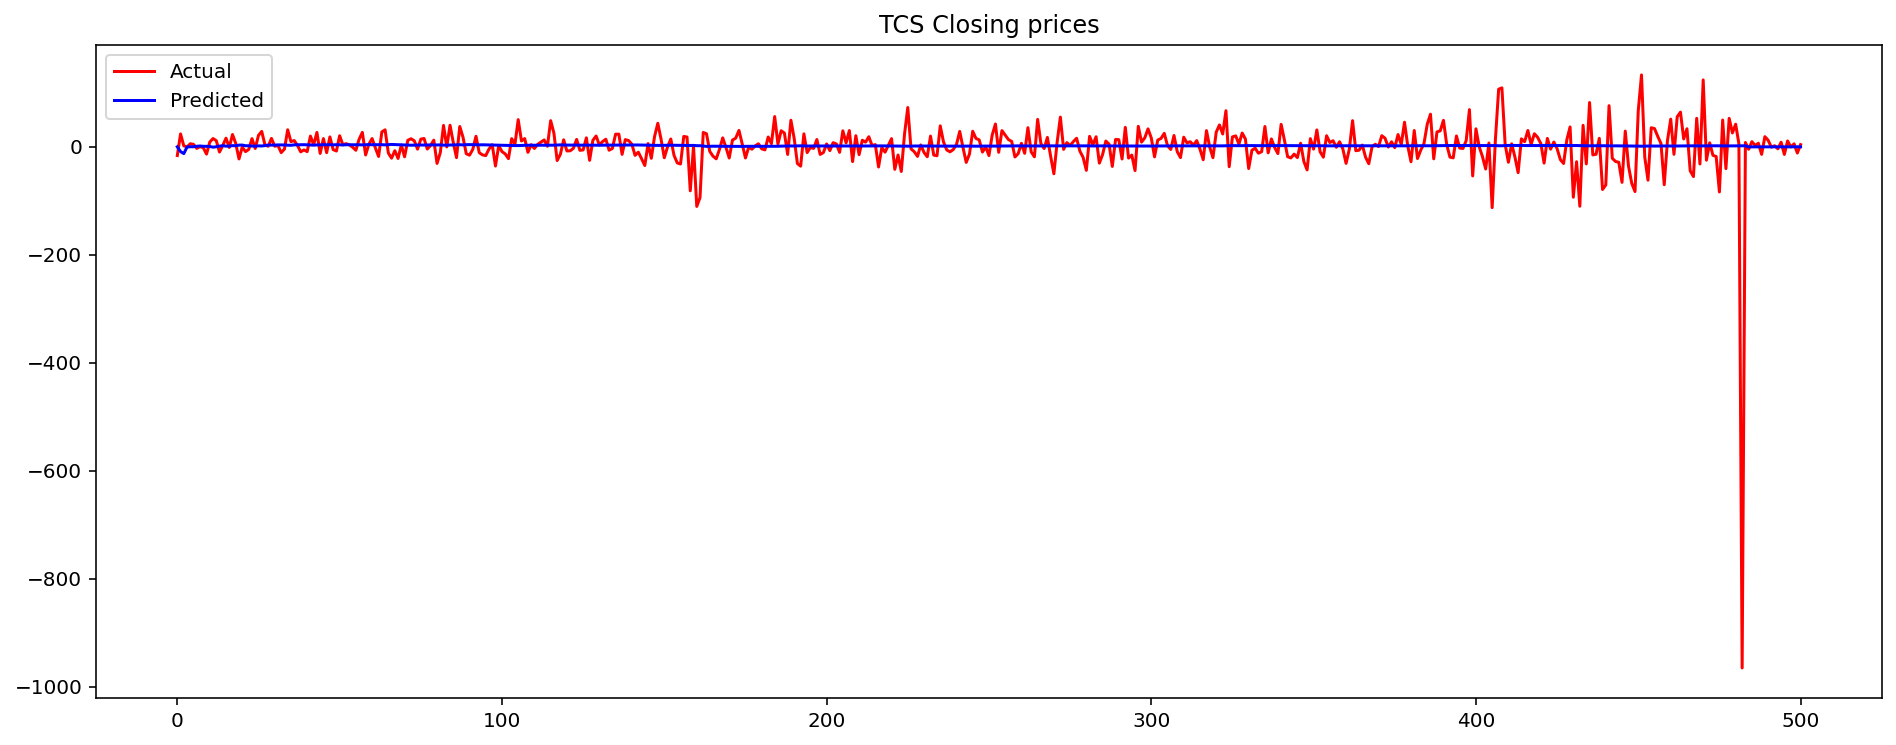

In [142]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('TCS Closing prices')
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt20.png')
plt.show()

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4306
Model:                    local level   Log Likelihood              -22183.882
Date:                Mon, 12 Dec 2022   AIC                          44371.763
Time:                        20:00:22   BIC                          44384.498
Sample:                             0   HQIC                         44376.261
                               - 4306                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1748.1412      2.046    854.562      0.000    1744.132    1752.151
sigma2.level      1.151e-14      0.002   4.88e-12      1.000      -0.005       0.005
Ljung-Box (L1) (Q):         

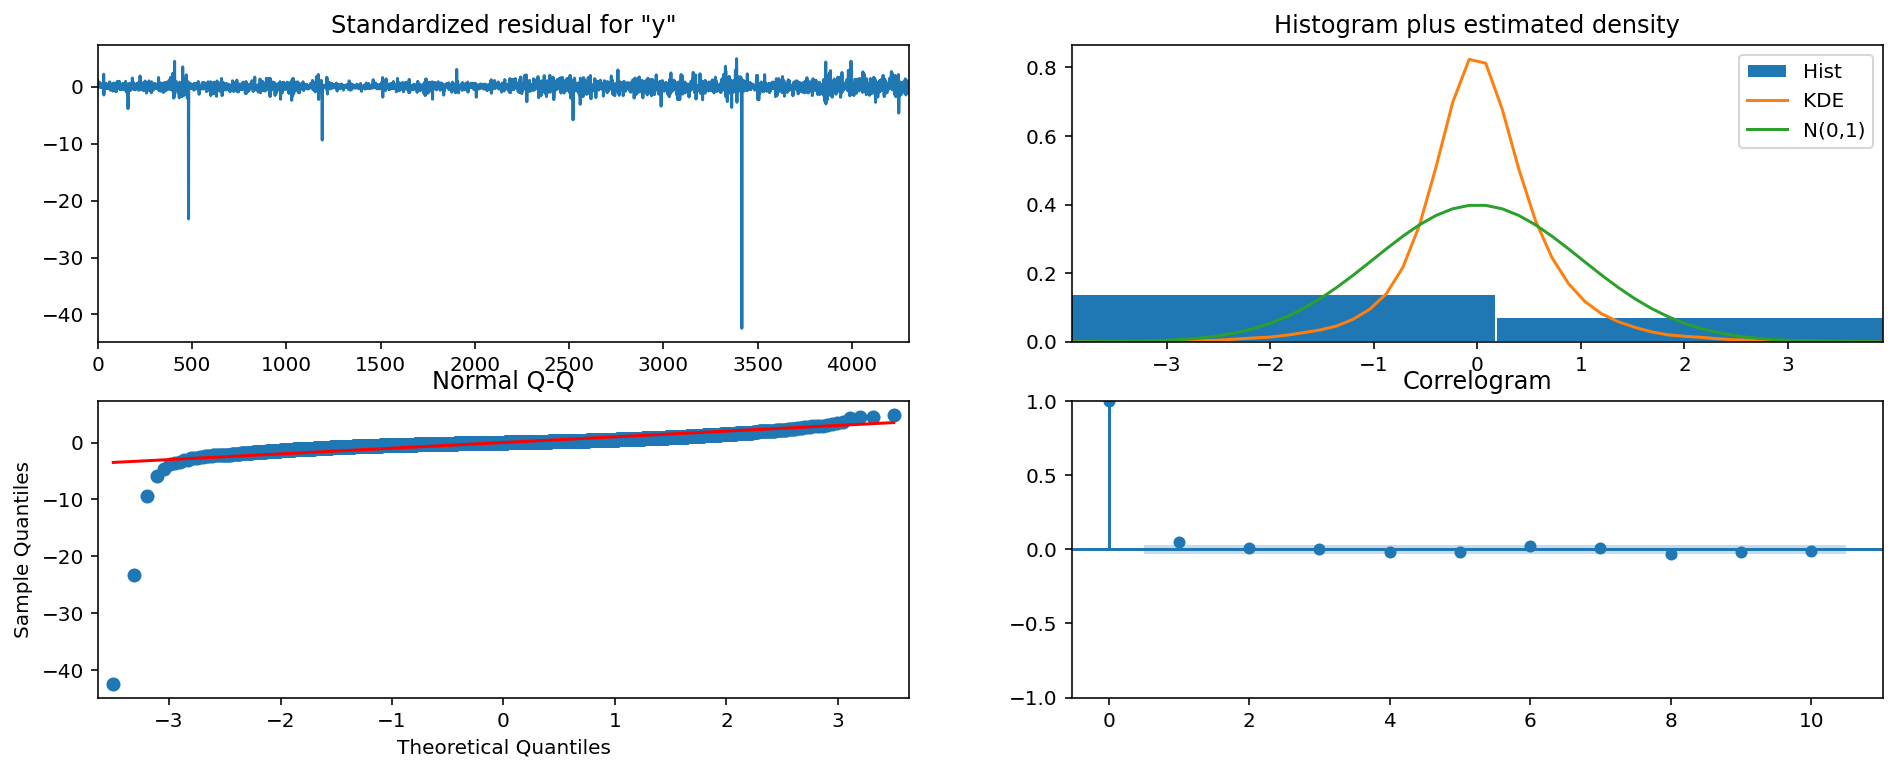

In [143]:
train_sample = tcs["highprice"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt21.png')

In [144]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 50.804421240656396.


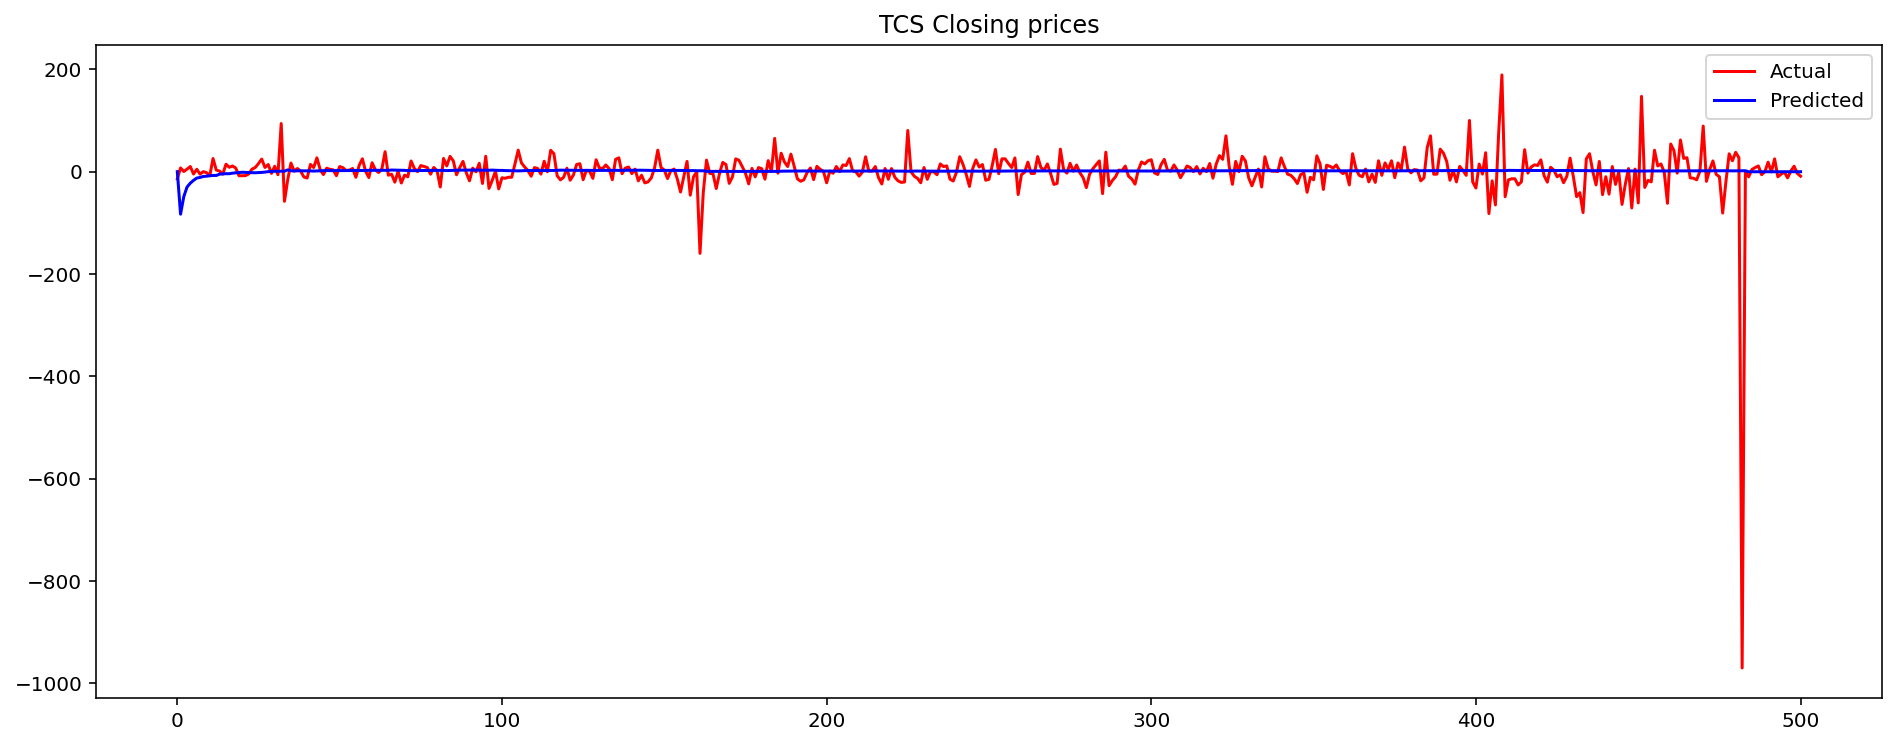

In [145]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('TCS Closing prices')
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt22.png')
plt.show()

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4306
Model:                    local level   Log Likelihood              -22136.828
Date:                Mon, 12 Dec 2022   AIC                          44277.656
Time:                        20:00:56   BIC                          44290.392
Sample:                             0   HQIC                         44282.154
                               - 4306                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1710.3120      1.968    869.077      0.000    1706.455    1714.169
sigma2.level      5.793e-10      0.002   2.43e-07      1.000      -0.005       0.005
Ljung-Box (L1) (Q):         

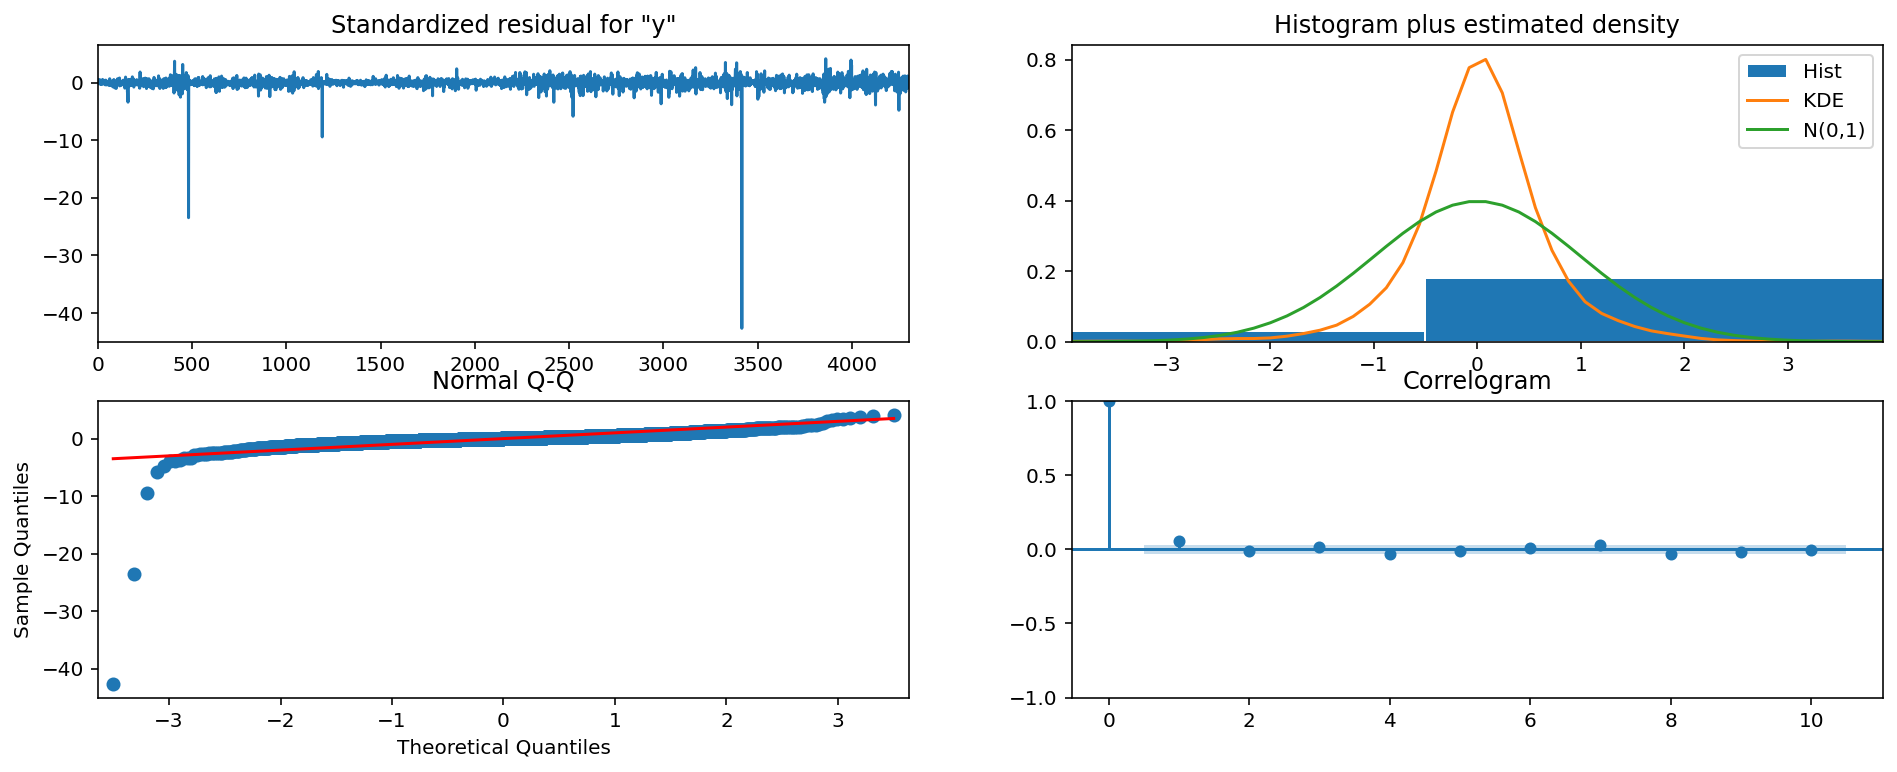

In [146]:
train_sample = tcs["wap"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt23.png')

In [147]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 49.96858876328841.


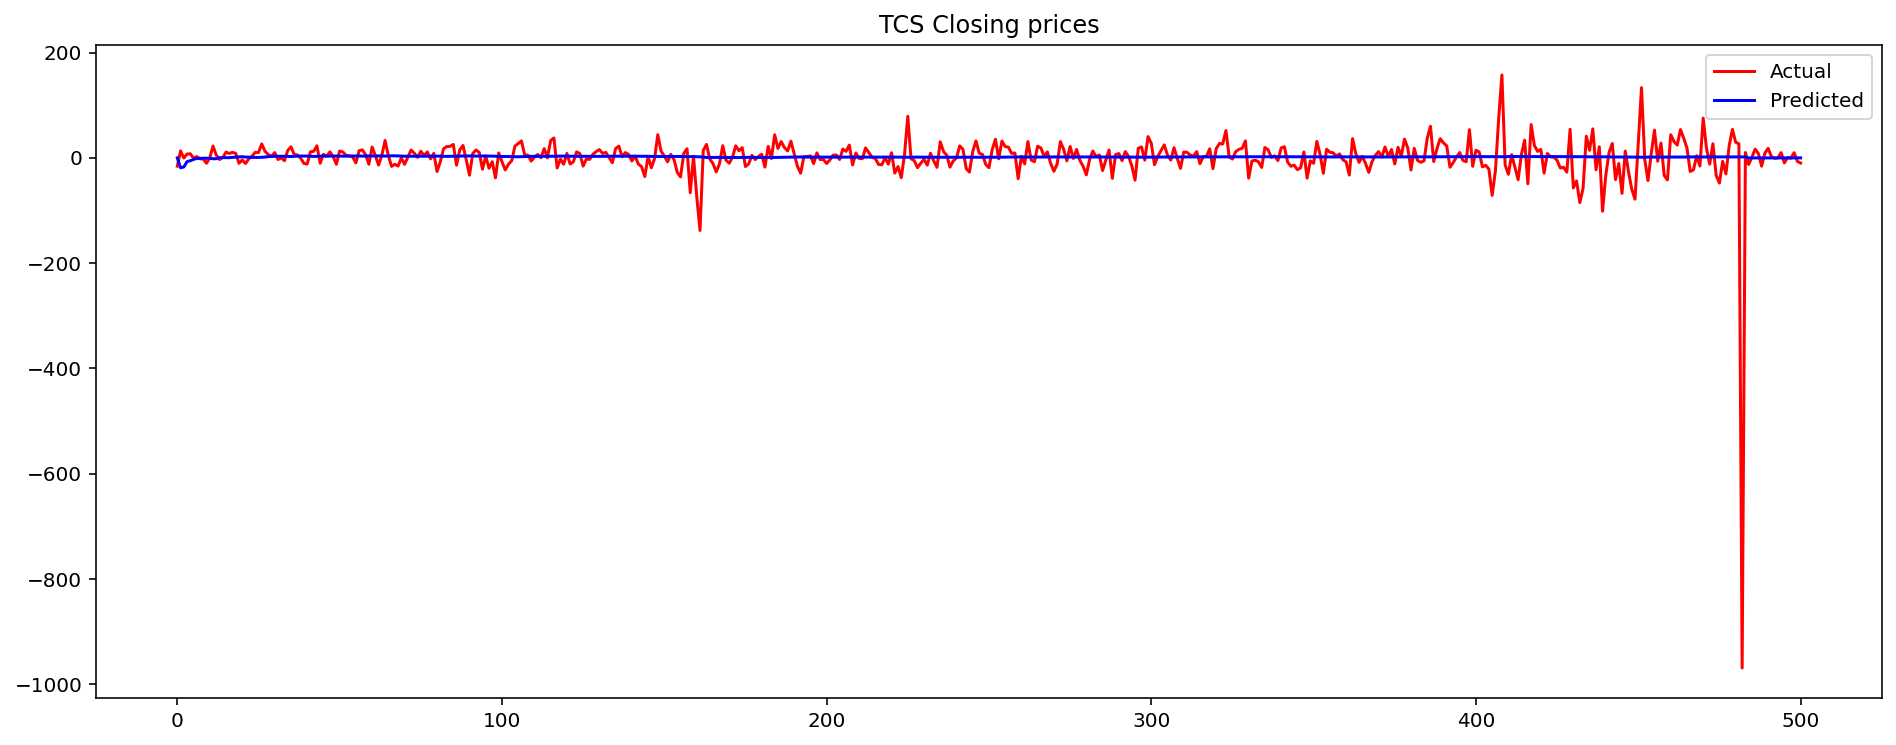

In [148]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('TCS Closing prices')
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt24.png')
plt.show()

## Dynamic Factor models
Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

                                   Statespace Model Results                                  
Dep. Variable:             ['highprice', 'lowprice']   No. Observations:                 4306
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -45381.565
Date:                               Mon, 12 Dec 2022   AIC                          90775.130
Time:                                       20:01:58   BIC                          90813.337
Sample:                                            0   HQIC                         90788.623
                                              - 4306                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):        1509.82, 798.20   Jarque-Bera (JB):   60197563.00, 14387.76
Prob(Q):                        0.00, 0.00   Prob(JB):                      0.00, 0.00
Heteroskedasticity (H):         2.66, 1.67   Skew:                        

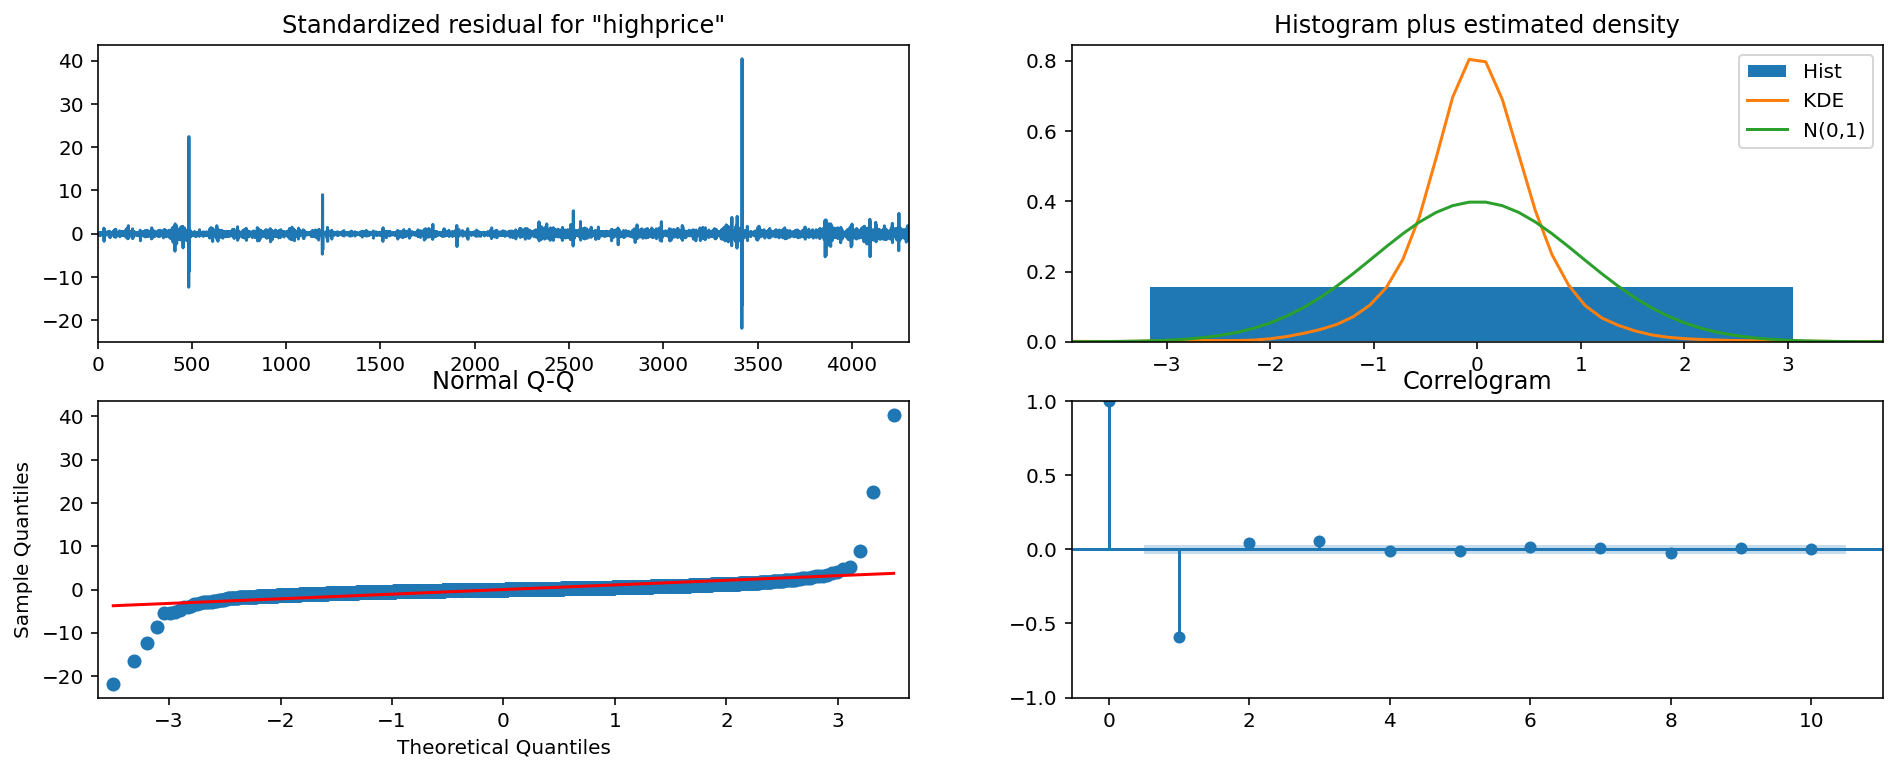

In [149]:
train_sample = pd.concat([tcs["highprice"].diff().iloc[1:], tcs["lowprice"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
plt.savefig('E:\Coding\Time Series Analysis\Src\Figure\plt25.png')

In [150]:
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 86.3446948789668.
